## Descriptive and Statsitical Analysis of Data

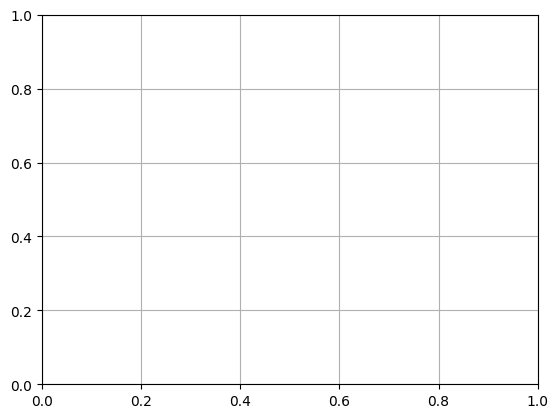

In [6]:
import pandas as pd 
from visualization import DataVisualizer as dv
import numpy as np
import matplotlib.pyplot as plt
data_visualizer = dv()

In [7]:
# Read BHT1 dataset from CSV file with semicolon separator
BHT_1 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT1.csv', sep=';')
# Remove the automatically generated index column
BHT_1.drop(columns=['Unnamed: 0'], inplace=True)

# Read BHT2 dataset from CSV file with semicolon separator
BHT_2 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT2.csv', sep=';')
# Remove the automatically generated index column
BHT_2.drop(columns=['Unnamed: 0'], inplace=True)

# Read BHT3 dataset from CSV file with comma separator
BHT_3 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/BHT3.csv', sep=',')
# Remove the automatically generated index column
BHT_3.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
# Define a function to count how many subjects each student pursued
def count_subjects_per_student(df):
    # Get all columns except 'status'
    module_columns = [col for col in df.columns if col != 'status']
    
    # Create a new dataframe to store the results
    student_enrollment = pd.DataFrame(index=df.index)
    
    # For each student, count how many subjects they're enrolled in
    # A student is enrolled if their grade is < 5.1
    student_enrollment['enrolled_subjects'] = df[module_columns].apply(
        lambda row: (row < 5.1).sum(), axis=1
    )
    student_enrollment['total_subjects'] = len(module_columns)
    student_enrollment['enrollment_percentage'] = (student_enrollment['enrolled_subjects'] / 
                                                 student_enrollment['total_subjects'] * 100)
    student_enrollment['status'] = df['status']
    
    return student_enrollment

def plot_passed_courses_distribution(df, column, sem):
    """
    Plots a pie chart for the distribution of passed courses.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the column.
    column (str): The column name to visualize.
    """
    course_counts = df[column].value_counts()
    course_counts.index = course_counts.index.astype(int).sort_values()

    # Break down values greater than 6
    course_counts_broken_down = course_counts.copy()
    course_counts_broken_down = course_counts_broken_down[course_counts_broken_down.index <= 6]
    
    # Add a new entry for "More than 6"
    if (course_counts.index > 6).any():
        course_counts_broken_down.loc['More than 6'] = course_counts[course_counts.index > 6].sum()

    course_counts_broken_down.plot(kind='pie', autopct='%1.0f%%', colors=plt.cm.Spectral(np.linspace(0.1, 0.42, len(course_counts_broken_down))), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    plt.title(f'{sem}')
    plt.ylabel('')
    plt.show()



## Analysis on BHT data

### BHT 1

In [10]:
BHT_1.head(15)

M01_1_N  M02_1_N  M03_1_N  M04_1_N  M05_1_N  M06_1_N  status
0       5.1      5.1      5.1      5.1      5.1      5.1       1
1       5.1      5.1      5.1      5.1      5.1      5.1       1
2       1.3      1.7      5.1      5.1      5.1      1.7       1
3       5.1      5.1      5.1      5.1      5.1      5.1       1
4       5.1      5.1      5.1      5.1      5.1      5.1       1
5       5.1      5.1      5.1      5.1      5.1      5.1       1
6       5.1      5.1      5.1      5.1      5.1      5.1       1
7       5.1      5.1      5.1      5.1      5.1      5.1       1
8       5.1      5.1      5.1      5.1      5.1      5.1       1
9       5.1      5.1      5.1      5.1      5.1      5.1       1
10      5.1      5.1      2.0      4.0      5.1      5.1       1
11      5.1      5.1      5.1      5.1      5.1      5.1       1
12      3.7      5.1      1.3      3.0      2.0      3.3       1
13      5.1      5.1      1.0      5.1      5.1      5.1       1
14      1.7      1.0      5.1      5.1      5.1      1.0       1

In [11]:
print(BHT_1.corrwith(BHT_1['status'], method='spearman'))
BHT_1.corr(method='spearman').style.background_gradient(cmap='Blues')

M01_1_N    0.182032
M02_1_N    0.242880
M03_1_N    0.139328
M04_1_N    0.320292
M05_1_N    0.275791
M06_1_N    0.238979
status     1.000000
dtype: float64


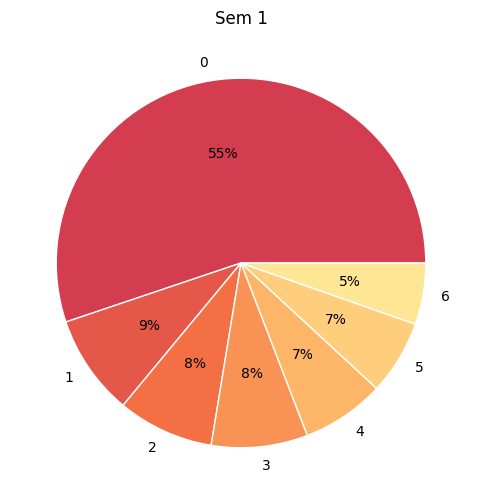

Distribution of students by number of modules enrolled:


Number of Modules  Percentage (%)
Number of Modules                                  
0                                 0            55.0
1                                 1             8.0
2                                 2             8.0
3                                 3             9.0
4                                 4             7.0
5                                 5             5.0
6                                 6             7.0

Text(0, 0.5, '')

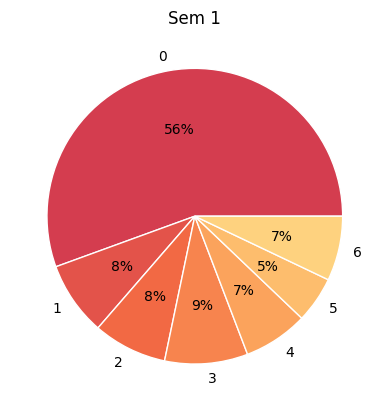

In [12]:
BHT_1_count_subjects_per_student = count_subjects_per_student(BHT_1)
plt.figure(figsize=(8, 6))
plot_passed_courses_distribution(BHT_1_count_subjects_per_student, 'enrolled_subjects', 'Sem 1')
# Count the number of students enrolled in each module
module_counts = BHT_1_count_subjects_per_student['enrolled_subjects'].value_counts().sort_index()

# Create a modified version where modules > 6 are grouped together
modified_counts = module_counts.copy()
more_than_6 = module_counts[module_counts.index > 6].sum()
modified_counts = modified_counts[modified_counts.index <= 6]
modified_counts.loc['More than 6'] = more_than_6

# Calculate the percentage of students enrolled in each module
total_students = len(BHT_1_count_subjects_per_student)
module_percentages = (modified_counts / total_students * 100).round(0)

# Create a DataFrame to display the results
module_distribution = pd.DataFrame({
    'Number of Modules': modified_counts.index,
    'Percentage (%)': module_percentages.values
})
module_distribution.index = module_distribution['Number of Modules']

# Display the table
print("Distribution of students by number of modules enrolled:")
display(module_distribution.iloc[0:7])
module_distribution['Percentage (%)'].iloc[0:7].plot(kind='pie', autopct='%1.0f%%', colors=plt.cm.Spectral(np.linspace(0.1, 0.42, len(module_distribution))), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Sem 1')
plt.ylabel('')

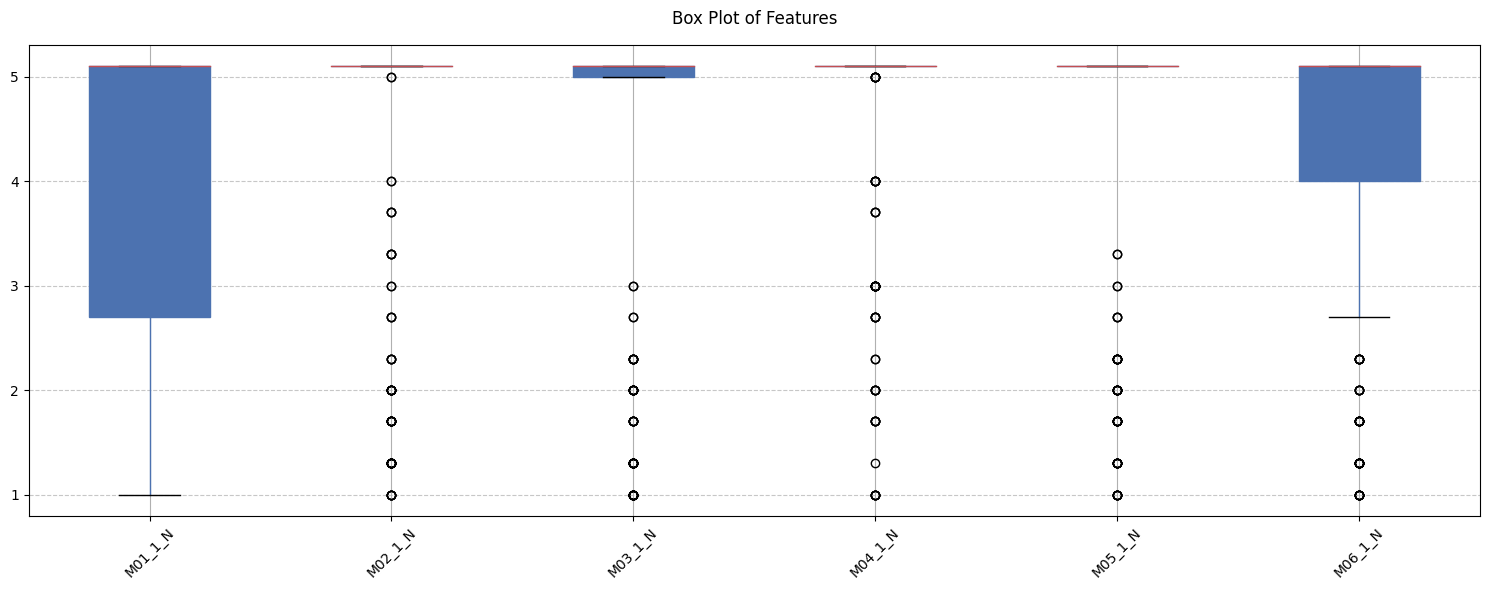

In [13]:
# Create a boxplot visualization of all features in BHT_1 dataset
data_visualizer.create_boxplot(BHT_1)

In [14]:
# Calculate central tendency measures (mean, median, mode) for BHT_1 dataset
data_visualizer.calculate_central_tendency(BHT_1)

Feature   Mean  Median   Mode
0  M01_1_N  4.172     5.1  5.100
1  M02_1_N  4.382     5.1  5.100
2  M03_1_N  4.233     5.1  5.100
3  M04_1_N  4.667     5.1  5.100
4  M05_1_N  4.468     5.1  5.100
5  M06_1_N  4.331     5.1  5.100

In [15]:
# Calculate dispersion measures (range, variance, standard deviation, IQR) for BHT_1 dataset
data_visualizer.calculate_dispersion_measures(BHT_1)

Feature  Range  Variance  Std_Dev  IQR
0  M01_1_N    4.1     2.084    1.443  2.4
1  M02_1_N    4.1     1.894    1.376  0.0
2  M03_1_N    4.1     2.389    1.546  0.1
3  M04_1_N    4.1     1.071    1.035  0.0
4  M05_1_N    4.1     1.725    1.313  0.0
5  M06_1_N    4.1     1.919    1.385  1.1

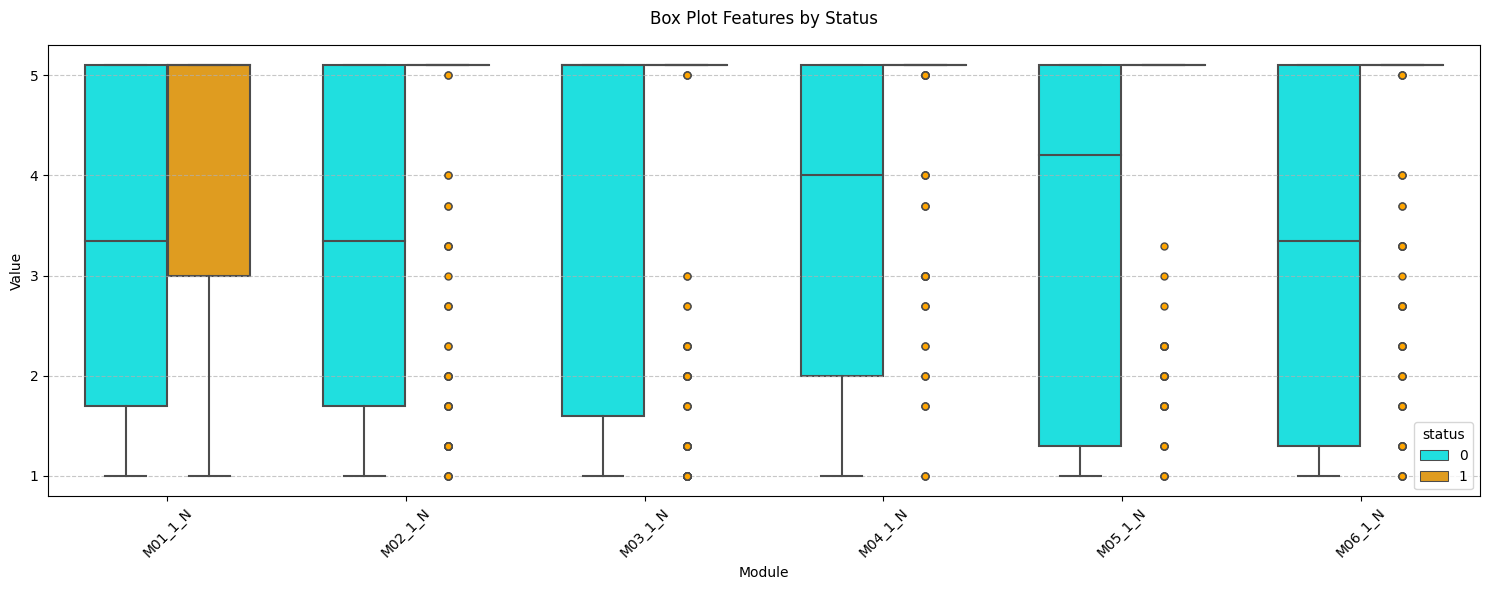

In [16]:
# Create a boxplot visualization comparing feature distributions between student status groups
data_visualizer.create_status_boxplot(BHT_1)

In [17]:
# Get detailed statistics broken down by student status
data_visualizer.get_status_statistics(BHT_1)

count   mean  median    std  min   q1   q3  max  iqr
feature status                                                      
M01_1_N 0          28  3.375    3.35  1.727  1.0  1.7  5.1  5.1  3.4
        1         233  4.268    5.10  1.379  1.0  3.0  5.1  5.1  2.1
M02_1_N 0          28  3.389    3.35  1.702  1.0  1.7  5.1  5.1  3.4
        1         233  4.501    5.10  1.286  1.0  5.1  5.1  5.1  0.0
M03_1_N 0          28  3.554    5.10  1.836  1.0  1.6  5.1  5.1  3.5
        1         233  4.315    5.10  1.491  1.0  5.1  5.1  5.1  0.0
M04_1_N 0          28  3.586    4.00  1.612  1.0  2.0  5.1  5.1  3.1
        1         233  4.797    5.10  0.860  1.0  5.1  5.1  5.1  0.0
M05_1_N 0          28  3.439    4.20  1.782  1.0  1.3  5.1  5.1  3.8
        1         233  4.591    5.10  1.192  1.0  5.1  5.1  5.1  0.0
M06_1_N 0          28  3.261    3.35  1.827  1.0  1.3  5.1  5.1  3.8
        1         233  4.460    5.10  1.268  1.0  5.1  5.1  5.1  0.0

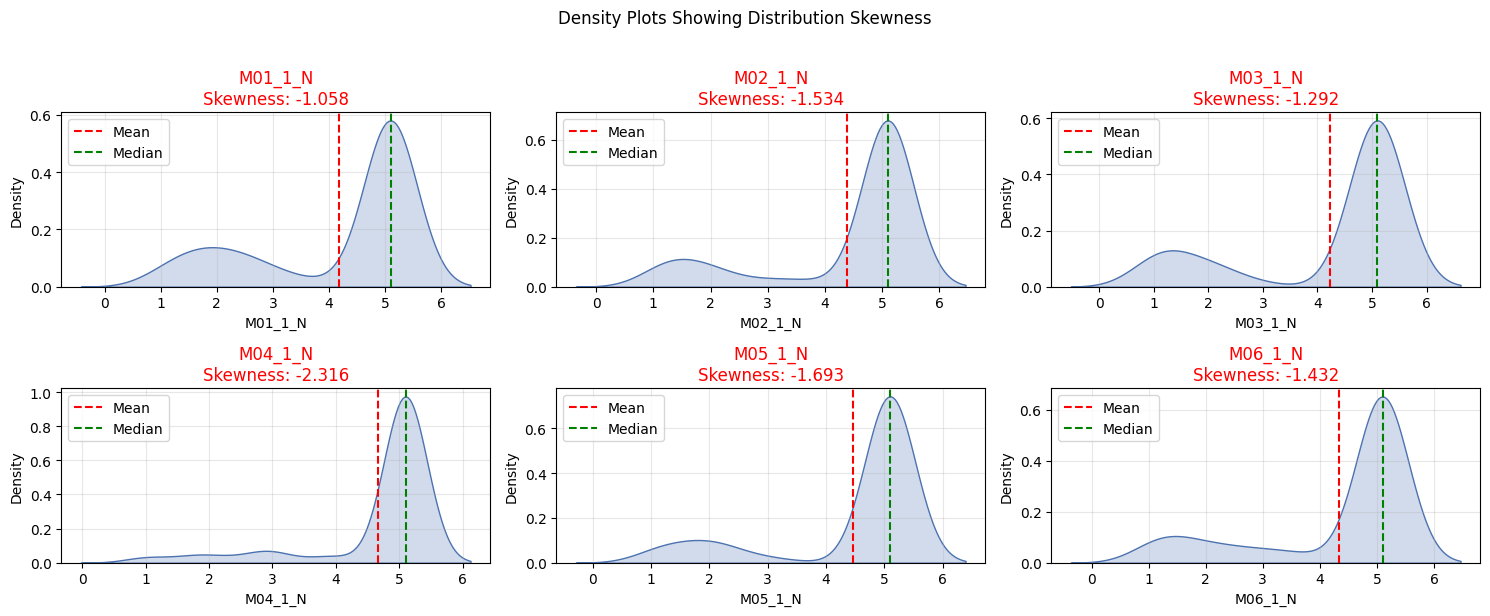

In [18]:
# Create density plots showing distribution skewness for each feature in BHT_1 dataset
data_visualizer.plot_density_skewness(BHT_1)

In [19]:
# Calculate skewness and kurtosis measures to understand the shape of distributions
data_visualizer.calculate_distribution_shape(BHT_1)

Feature  Skewness             Skewness_Interpretation  Kurtosis  \
0  M01_1_N    -1.058  Highly Negative (Strong Left Tail)    -0.637   
1  M02_1_N    -1.534  Highly Negative (Strong Left Tail)     0.575   
2  M03_1_N    -1.292  Highly Negative (Strong Left Tail)    -0.210   
3  M04_1_N    -2.316  Highly Negative (Strong Left Tail)     4.132   
4  M05_1_N    -1.693  Highly Negative (Strong Left Tail)     1.083   
5  M06_1_N    -1.432  Highly Negative (Strong Left Tail)     0.349   

      Kurtosis_Interpretation  
0  Platykurtic (Light-tailed)  
1  Mesokurtic (Normal-tailed)  
2  Platykurtic (Light-tailed)  
3  Leptokurtic (Heavy-tailed)  
4  Leptokurtic (Heavy-tailed)  
5  Mesokurtic (Normal-tailed)

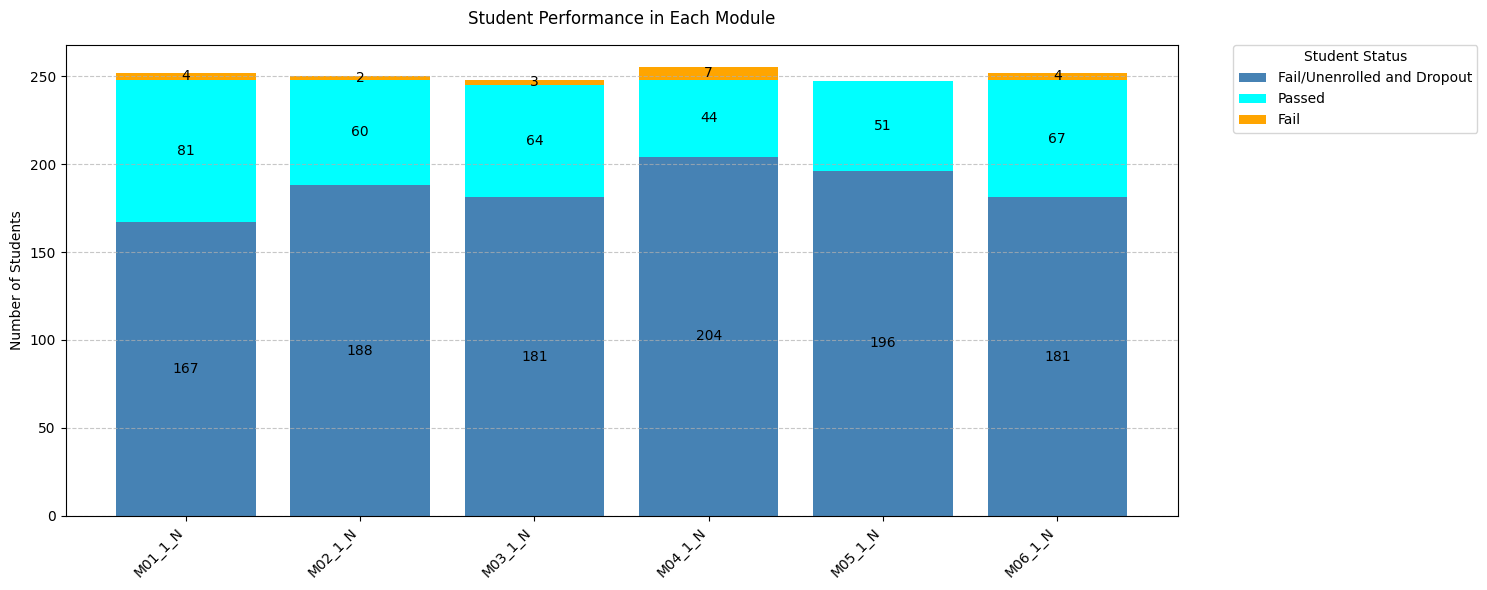

In [20]:
# Create a stacked bar plot showing the distribution of student performance across modules
data_visualizer.plot_bar_matplotlib(BHT_1)

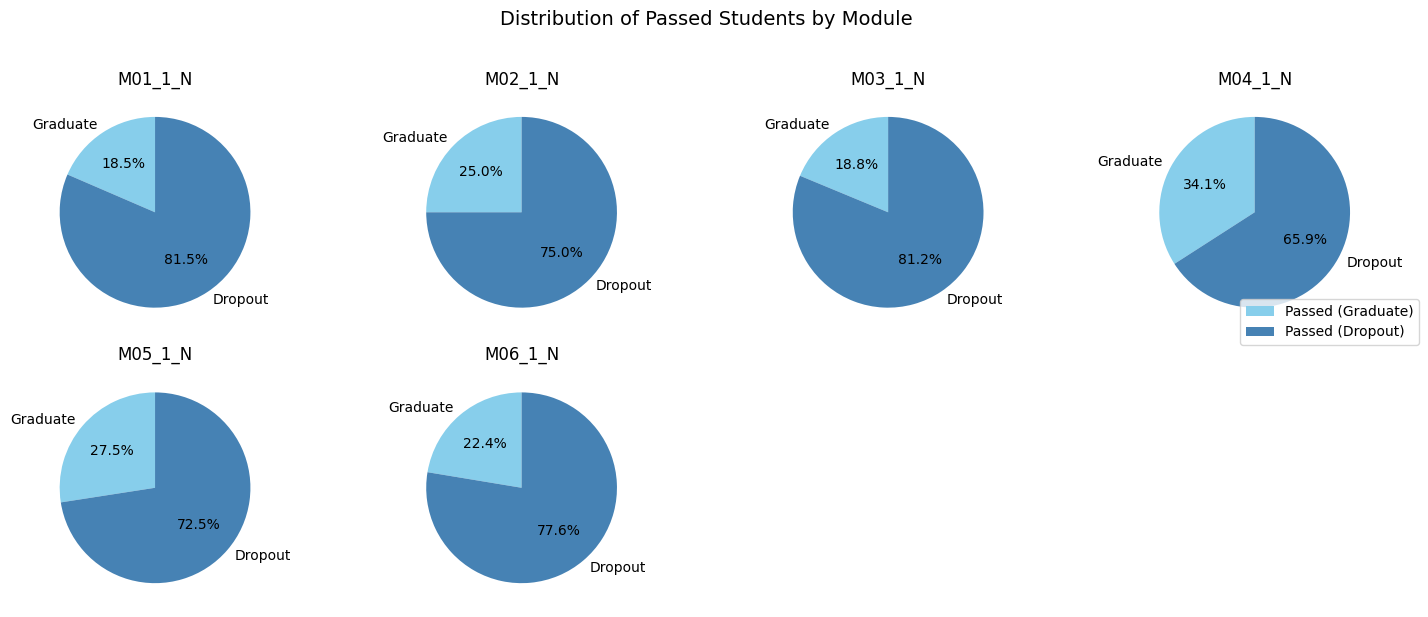

In [21]:
# Create a pie chart showing the distribution of passed students across modules
data_visualizer.plot_passed_students_pie(BHT_1)

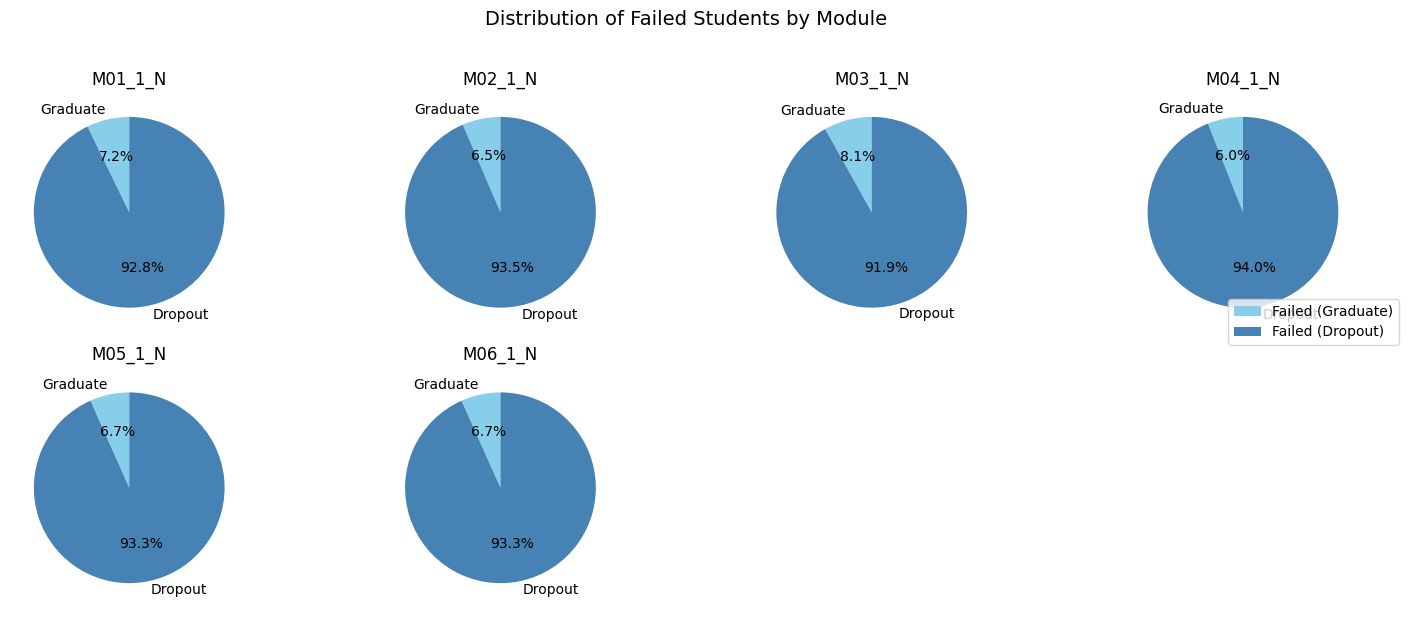

In [22]:
# Create a pie chart showing the distribution of failed students across modules
data_visualizer.plot_failed_students_pie(BHT_1)

### BHT 2

In [23]:
print(BHT_2.corrwith(BHT_2['status'], method='spearman'))
BHT_2.corr(method='spearman').style.background_gradient(cmap='Blues')

M01_2_N    0.208473
M02_2_N    0.233872
M03_2_N    0.146410
M04_2_N    0.336860
M05_2_N    0.292130
M06_2_N    0.205059
M07_2_N    0.376804
M08_2_N    0.350524
M09_2_N    0.330936
M10_2_N    0.398395
M11_2_N    0.411149
M12_2_N    0.066968
status     1.000000
dtype: float64


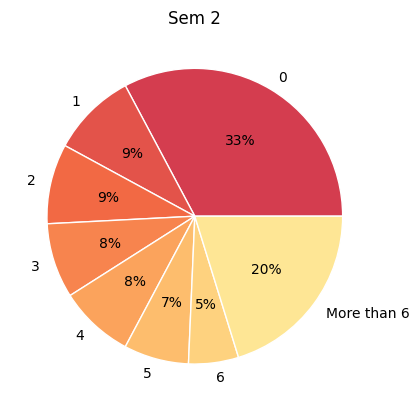

Distribution of students by number of modules enrolled:


Number of Modules  Percentage (%)
Number of Modules                                  
0                                 0            33.0
1                                 1             7.0
2                                 2             8.0
3                                 3             5.0
4                                 4             8.0
5                                 5             4.0
6                                 6             9.0
More than 6             More than 6            26.0

Text(0.5, 1.0, 'Sem 2')

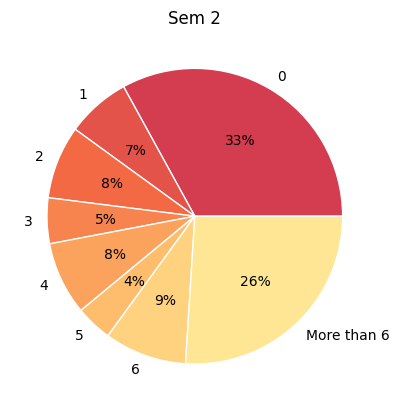

In [24]:
BHT_2_count_subjects_per_student = count_subjects_per_student(BHT_2)
plot_passed_courses_distribution(BHT_2_count_subjects_per_student, 'enrolled_subjects', 'Sem 2')
# Count the number of students enrolled in each module
module_counts = BHT_2_count_subjects_per_student['enrolled_subjects'].value_counts().sort_index()

# Create a modified version where modules > 6 are grouped together
modified_counts = module_counts.copy()
more_than_6 = module_counts[module_counts.index > 6].sum()
modified_counts = modified_counts[modified_counts.index <= 6]
modified_counts.loc['More than 6'] = more_than_6

# Calculate the percentage of students enrolled in each module
total_students = len(BHT_2_count_subjects_per_student)
module_percentages = (modified_counts / total_students * 100).round(0)

# Create a DataFrame to display the results
module_distribution = pd.DataFrame({
    'Number of Modules': modified_counts.index,
    'Percentage (%)': module_percentages.values
})
module_distribution.index = module_distribution['Number of Modules']

# Display the table
print("Distribution of students by number of modules enrolled:")
display(module_distribution)
module_distribution['Percentage (%)'].plot(kind='pie', autopct='%1.0f%%', colors=plt.cm.Spectral(np.linspace(0.1, 0.42, len(module_distribution))), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.ylabel('')
plt.title('Sem 2')

In [25]:
# Calculate measures of central tendency (mean, median, mode) for BHT_2 dataset
data_visualizer.calculate_central_tendency(BHT_2)

Feature   Mean  Median   Mode
0   M01_2_N  3.550     4.0  5.100
1   M02_2_N  3.720     5.1  5.100
2   M03_2_N  3.461     5.1  5.100
3   M04_2_N  4.166     5.1  5.100
4   M05_2_N  3.897     5.1  5.100
5   M06_2_N  3.698     5.1  5.100
6   M07_2_N  4.562     5.1  5.100
7   M08_2_N  4.518     5.1  5.100
8   M09_2_N  4.269     5.1  5.100
9   M10_2_N  4.774     5.1  5.100
10  M11_2_N  4.760     5.1  5.100
11  M12_2_N  5.036     5.1  5.100

In [26]:
# Calculate measures of dispersion (range, variance, standard deviation, IQR) for BHT_2 dataset
data_visualizer.calculate_dispersion_measures(BHT_2)

Feature  Range  Variance  Std_Dev  IQR
0   M01_2_N    4.1     2.501    1.581  3.1
1   M02_2_N    4.1     2.474    1.573  3.1
2   M03_2_N    4.1     3.235    1.799  3.4
3   M04_2_N    4.1     1.831    1.353  2.1
4   M05_2_N    4.1     2.590    1.609  2.8
5   M06_2_N    4.1     2.527    1.590  3.1
6   M07_2_N    4.1     1.566    1.251  0.0
7   M08_2_N    4.1     1.795    1.340  0.0
8   M09_2_N    4.1     2.427    1.558  0.0
9   M10_2_N    4.1     0.934    0.967  0.0
10  M11_2_N    4.1     0.732    0.855  0.0
11  M12_2_N    4.1     0.247    0.497  0.0

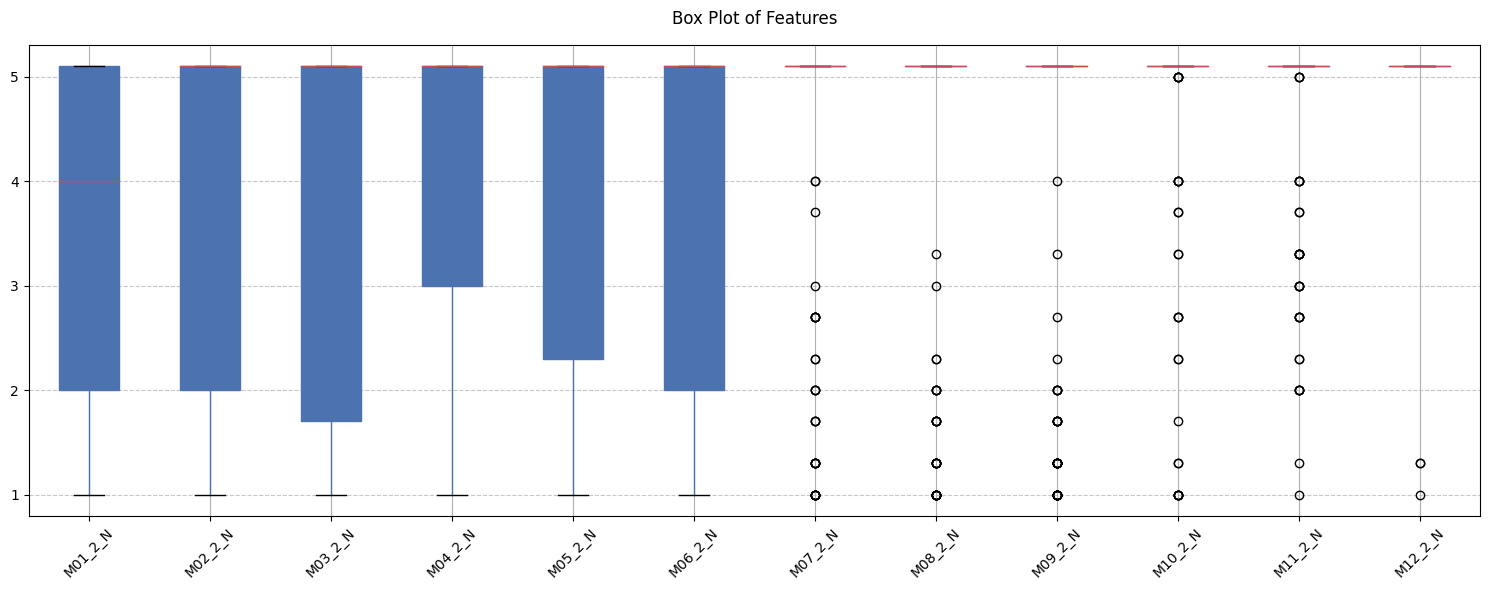

In [27]:
# Create a boxplot to visualize the distribution of scores across all modules in BHT_2 dataset
data_visualizer.create_boxplot(BHT_2)

In [28]:
# Calculate descriptive statistics grouped by student status for BHT_2 dataset
data_visualizer.get_status_statistics(BHT_2)

count   mean  median    std  min    q1    q3  max   iqr
feature status                                                         
M01_2_N 0          27  2.789    2.00  1.576  1.0  1.70  4.55  5.1  2.85
        1         156  3.682    5.05  1.550  1.0  2.30  5.10  5.1  2.80
M02_2_N 0          27  2.789    2.30  1.518  1.0  1.70  4.40  5.1  2.70
        1         156  3.881    5.10  1.530  1.0  2.30  5.10  5.1  2.80
M03_2_N 0          27  2.744    2.00  1.732  1.0  1.30  5.10  5.1  3.80
        1         156  3.585    5.10  1.786  1.0  1.70  5.10  5.1  3.40
M04_2_N 0          27  3.041    3.00  1.423  1.0  1.85  4.00  5.1  2.15
        1         156  4.361    5.10  1.246  1.0  3.70  5.10  5.1  1.40
M05_2_N 0          27  2.789    2.30  1.672  1.0  1.30  5.10  5.1  3.80
        1         156  4.088    5.10  1.524  1.0  2.30  5.10  5.1  2.80
M06_2_N 0          27  2.896    2.00  1.712  1.0  1.30  5.10  5.1  3.80
        1         156  3.837    5.10  1.531  1.0  2.30  5.10  5.1  2.80
M07_2_N 0          27  3.467    3.70  1.688  1.0  1.85  5.10  5.1  3.25
        1         156  4.752    5.10  1.056  1.0  5.10  5.10  5.1  0.00
M08_2_N 0          27  3.407    5.10  1.840  1.0  1.50  5.10  5.1  3.60
        1         156  4.710    5.10  1.135  1.0  5.10  5.10  5.1  0.00
M09_2_N 0          27  3.000    2.00  1.936  1.0  1.30  5.10  5.1  3.80
        1         156  4.488    5.10  1.375  1.0  5.10  5.10  5.1  0.00
M10_2_N 0          27  3.878    5.10  1.544  1.0  2.50  5.10  5.1  2.60
        1         156  4.929    5.10  0.730  1.0  5.10  5.10  5.1  0.00
M11_2_N 0          27  3.822    3.70  1.357  1.0  2.85  5.10  5.1  2.25
        1         156  4.922    5.10  0.608  1.3  5.10  5.10  5.1  0.00
M12_2_N 0          27  4.959    5.10  0.731  1.3  5.10  5.10  5.1  0.00
        1         156  5.049    5.10  0.446  1.0  5.10  5.10  5.1  0.00

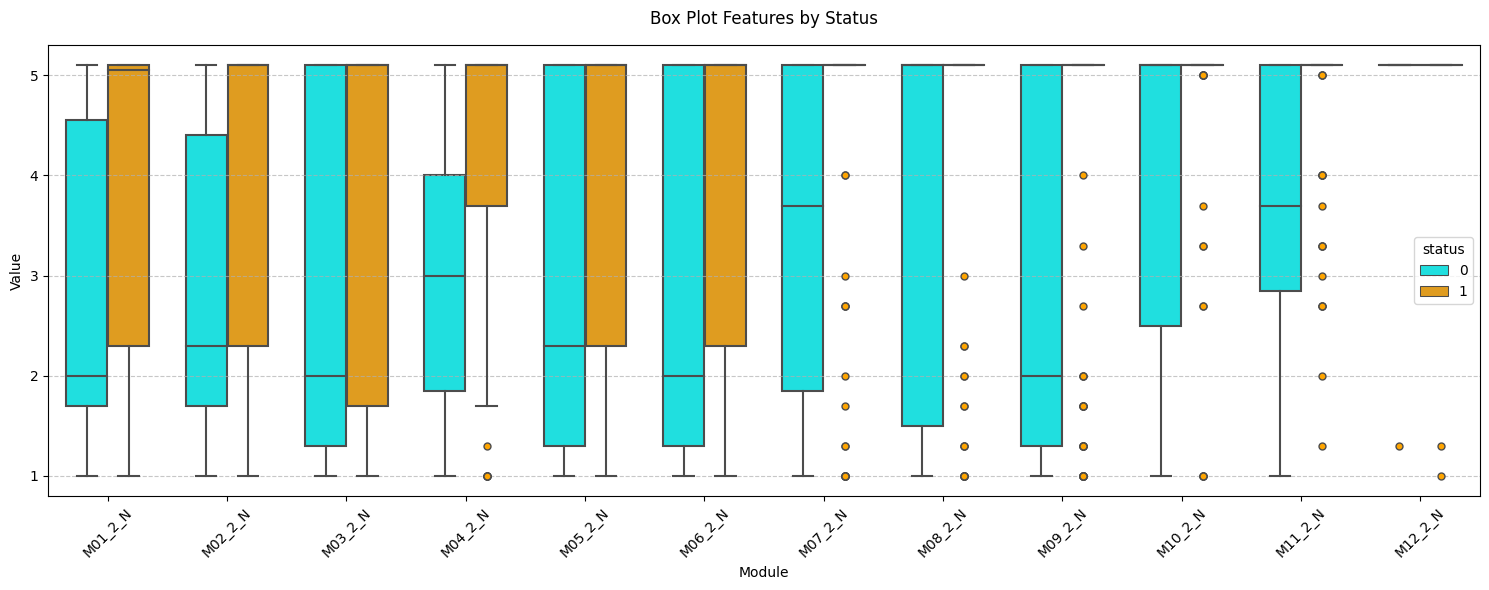

In [29]:
data_visualizer.create_status_boxplot(BHT_2)
# Create a boxplot showing the distribution of scores across modules, grouped by student status
# This visualization helps compare performance between graduates and dropouts for BHT_2


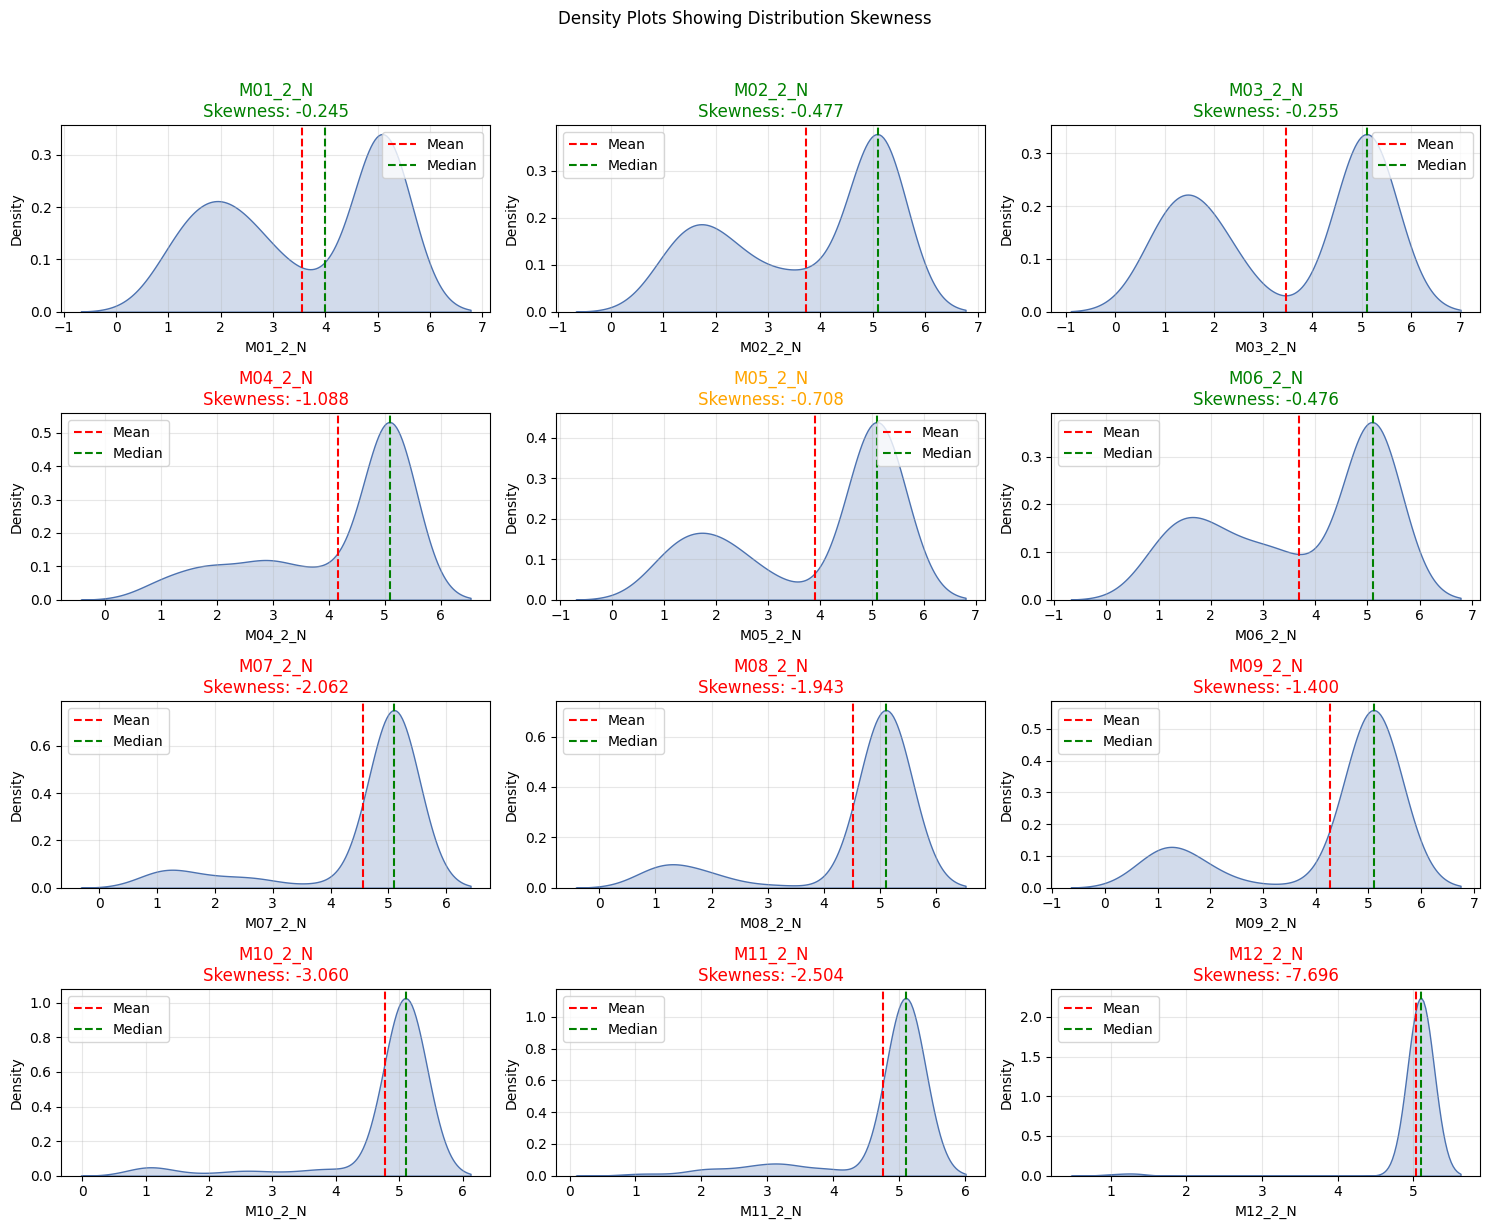

In [30]:
# Create density plots showing distribution skewness for BHT_2 dataset
# This visualization helps analyze the shape and symmetry of score distributions
# by displaying density curves with mean and median markers for each module
data_visualizer.plot_density_skewness(BHT_2)


In [31]:
# Calculate skewness and kurtosis measures for BHT_2 dataset
# This helps understand the shape of the distribution for each module:
# - Skewness indicates asymmetry (negative = left tail, positive = right tail)
# - Kurtosis indicates tail weight/peak (higher = heavier tails/sharper peak)
data_visualizer.calculate_distribution_shape(BHT_2)

Feature  Skewness             Skewness_Interpretation  Kurtosis  \
0   M01_2_N    -0.245             Approximately Symmetric    -1.650   
1   M02_2_N    -0.477             Approximately Symmetric    -1.507   
2   M03_2_N    -0.255             Approximately Symmetric    -1.834   
3   M04_2_N    -1.088  Highly Negative (Strong Left Tail)    -0.311   
4   M05_2_N    -0.708     Moderately Negative (Left Tail)    -1.317   
5   M06_2_N    -0.476             Approximately Symmetric    -1.474   
6   M07_2_N    -2.062  Highly Negative (Strong Left Tail)     2.579   
7   M08_2_N    -1.943  Highly Negative (Strong Left Tail)     1.939   
8   M09_2_N    -1.400  Highly Negative (Strong Left Tail)     0.051   
9   M10_2_N    -3.060  Highly Negative (Strong Left Tail)     8.285   
10  M11_2_N    -2.504  Highly Negative (Strong Left Tail)     5.357   
11  M12_2_N    -7.696  Highly Negative (Strong Left Tail)    57.952   

                 Kurtosis_Interpretation  
0   Very Platykurtic (Very Light-tailed)  
1   Very Platykurtic (Very Light-tailed)  
2   Very Platykurtic (Very Light-tailed)  
3             Platykurtic (Light-tailed)  
4   Very Platykurtic (Very Light-tailed)  
5   Very Platykurtic (Very Light-tailed)  
6             Leptokurtic (Heavy-tailed)  
7             Leptokurtic (Heavy-tailed)  
8             Mesokurtic (Normal-tailed)  
9             Leptokurtic (Heavy-tailed)  
10            Leptokurtic (Heavy-tailed)  
11            Leptokurtic (Heavy-tailed)

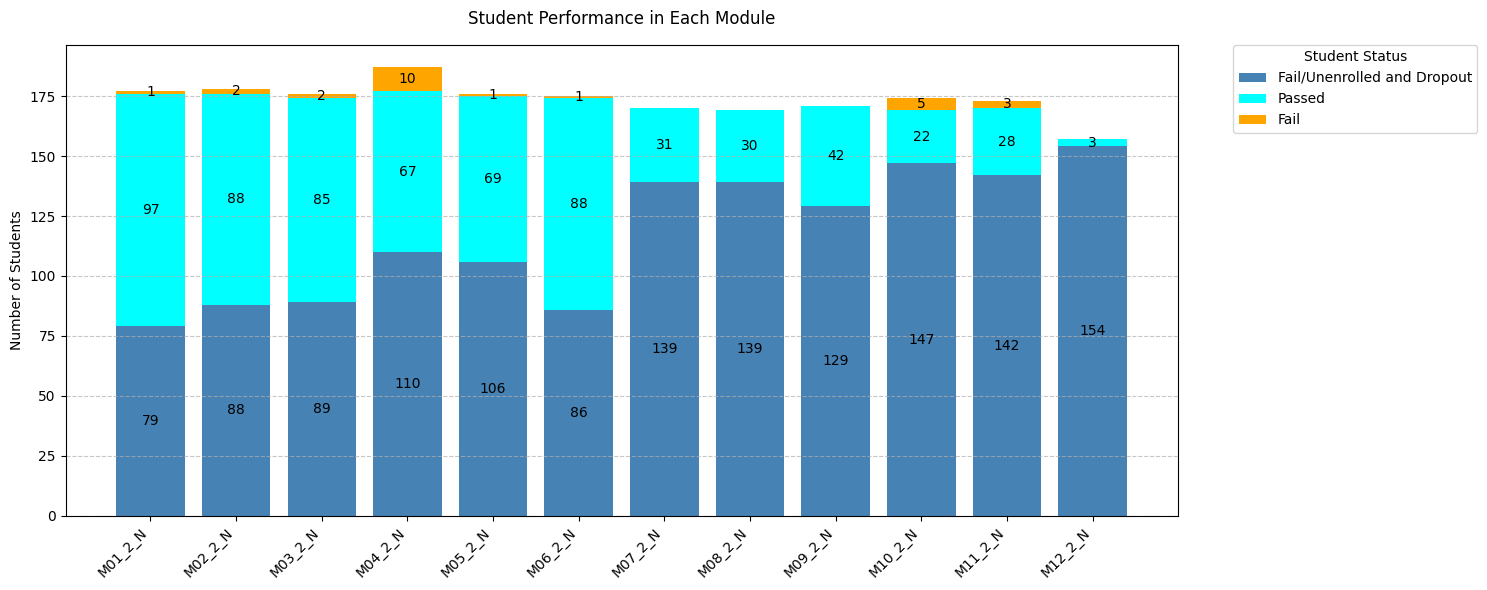

In [32]:
# Create a stacked bar plot showing the distribution of student performance in BHT_2 dataset
# This visualization displays:
# - Number of students who passed each module
# - Number of students who failed each module
# - Breakdown by graduate vs dropout status

data_visualizer.plot_bar_matplotlib(BHT_2)

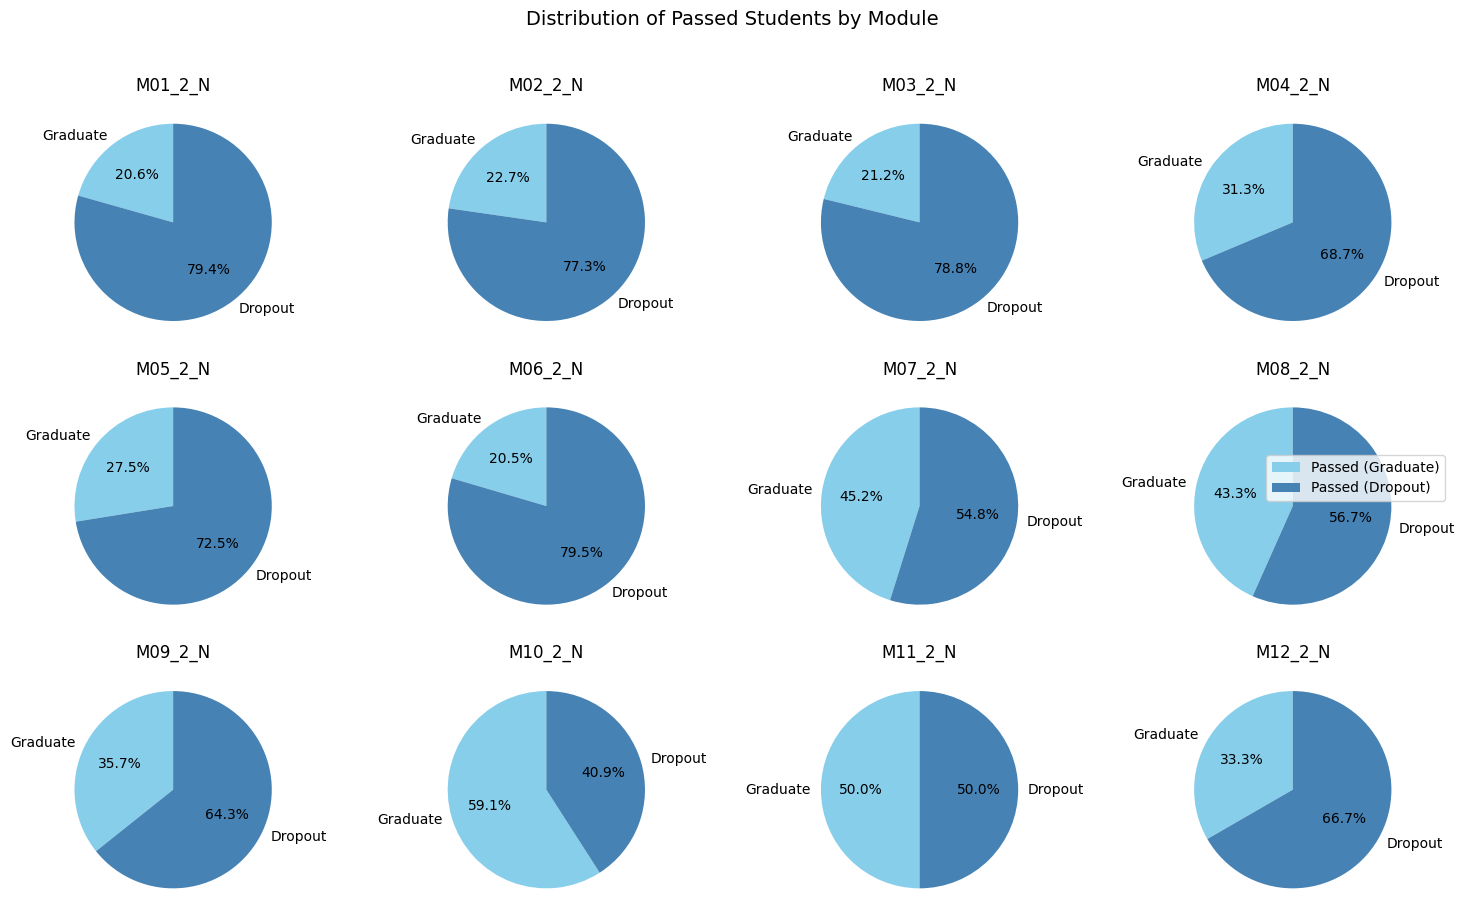

In [33]:
# Create pie charts showing the distribution of passed students for BHT_2 dataset
# This visualization displays:
# - Percentage of graduates vs dropouts among students who passed each module
# - Helps identify if passing students tend to graduate or dropout
data_visualizer.plot_passed_students_pie(BHT_2)

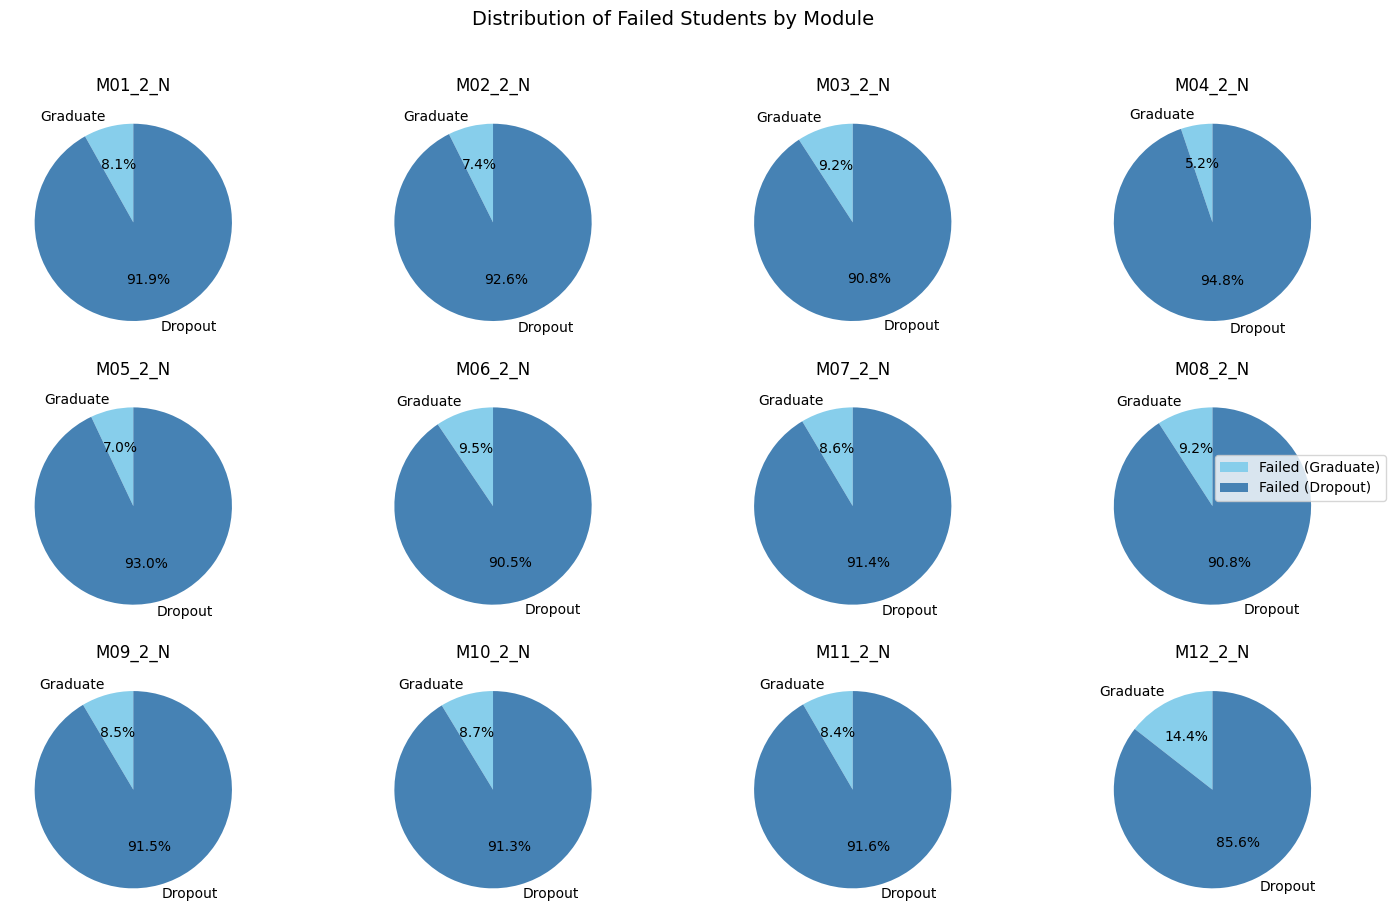

In [34]:
# Create pie charts showing the distribution of failed students for BHT_2 dataset
# This visualization displays:
# - Percentage of graduates vs dropouts among students who failed each module
# - Helps identify if failing students tend to graduate or dropout
data_visualizer.plot_failed_students_pie(BHT_2)


### BHT 3

In [35]:
print(BHT_3.corrwith(BHT_3['status'], method='spearman'))
BHT_3.corr(method='spearman').style.background_gradient(cmap='Blues')

M01_3_N    0.258031
M02_3_N    0.338711
M03_3_N    0.159862
M04_3_N    0.376002
M05_3_N    0.318984
M06_3_N   -0.067704
M07_3_N   -0.057491
M08_3_N    0.472939
M09_3_N    0.506417
M10_3_N    0.546770
M11_3_N    0.478178
M12_3_N    0.169675
M13_3_N    0.519133
M14_3_N    0.463065
M15_3_N    0.478605
M16_3_N    0.275898
M17_3_N    0.360556
status     1.000000
dtype: float64


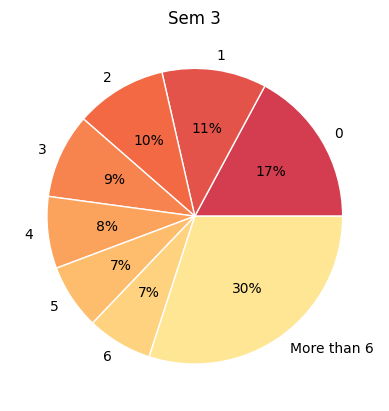

Distribution of students by number of modules enrolled:


Number of Modules  Percentage (%)
Number of Modules                                  
0                                 0            17.0
1                                 1             7.0
2                                 2             6.0
3                                 3             4.0
4                                 4             8.0
5                                 5            11.0
6                                 6             9.0
More than 6             More than 6            37.0

Text(0, 0.5, '')

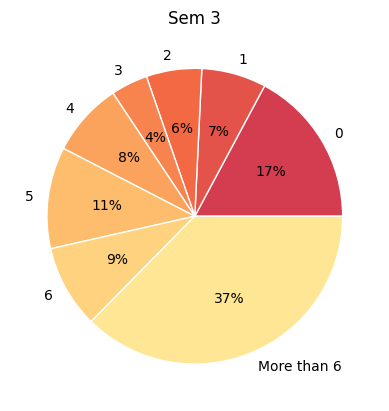

In [36]:
BHT_3_count_subjects_per_student = count_subjects_per_student(BHT_3)
plot_passed_courses_distribution(BHT_3_count_subjects_per_student, 'enrolled_subjects', 'Sem 3')
# Count the number of students enrolled in each module
module_counts = BHT_3_count_subjects_per_student['enrolled_subjects'].value_counts().sort_index()

# Create a modified version where modules > 6 are grouped together
modified_counts = module_counts.copy()
more_than_6 = module_counts[module_counts.index > 6].sum()
modified_counts = modified_counts[modified_counts.index <= 6]
modified_counts.loc['More than 6'] = more_than_6

# Calculate the percentage of students enrolled in each module
total_students = len(BHT_3_count_subjects_per_student)
module_percentages = (modified_counts / total_students * 100).round(0)

# Create a DataFrame to display the results
module_distribution = pd.DataFrame({
    'Number of Modules': modified_counts.index,
    'Percentage (%)': module_percentages.values
})
module_distribution.index = module_distribution['Number of Modules']
# Display the table
print("Distribution of students by number of modules enrolled:")
display(module_distribution)
module_distribution['Percentage (%)'].plot(kind='pie', autopct='%1.0f%%', colors=plt.cm.Spectral(np.linspace(0.1, 0.42, len(module_distribution))), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Sem 3')
plt.ylabel('')

In [37]:
# Calculate central tendency measures (mean, median, mode) for BHT_3 dataset
# - Mean shows the average grade across all students
# - Median indicates the middle value, less affected by outliers
# - Mode reveals the most frequently occurring grade
# This combination helps identify typical performance and any grade clustering
data_visualizer.calculate_central_tendency(BHT_3)


Feature   Mean  Median   Mode
0   M01_3_N  3.163     2.7  5.100
1   M02_3_N  3.260     3.0  5.100
2   M03_3_N  2.904     2.0  5.100
3   M04_3_N  3.721     4.0  5.100
4   M05_3_N  3.431     3.3  5.100
5   M06_3_N  4.909     5.1  5.100
6   M07_3_N  5.056     5.1  5.100
7   M08_3_N  4.135     5.1  5.100
8   M09_3_N  3.594     5.1  5.100
9   M10_3_N  4.369     5.1  5.100
10  M11_3_N  4.459     5.1  5.100
11  M12_3_N  4.943     5.1  5.100
12  M13_3_N  4.464     5.1  5.100
13  M14_3_N  4.399     5.1  5.100
14  M15_3_N  4.647     5.1  5.100
15  M16_3_N  4.220     5.1  5.100
16  M17_3_N  4.512     5.1  5.100

In [38]:
# Calculate dispersion measures (range, variance, std dev, IQR) for BHT_3 dataset
# - Range shows the full spread from lowest to highest grade
# - Variance measures average squared deviation from the mean
# - Standard deviation gives spread in same units as grades
# - IQR shows spread of middle 50% of grades, robust to outliers
data_visualizer.calculate_dispersion_measures(BHT_3)

Feature  Range  Variance  Std_Dev    IQR
0   M01_3_N    4.1     2.343    1.531  3.400
1   M02_3_N    4.1     2.511    1.585  3.400
2   M03_3_N    4.1     3.125    1.768  3.800
3   M04_3_N    4.1     2.046    1.430  2.400
4   M05_3_N    4.1     2.776    1.666  3.400
5   M06_3_N    4.1     0.539    0.734  0.000
6   M07_3_N    3.8     0.143    0.379  0.000
7   M08_3_N    4.1     2.666    1.633  2.800
8   M09_3_N    4.1     3.339    1.827  3.800
9   M10_3_N    4.1     1.709    1.307  1.100
10  M11_3_N    4.1     1.246    1.116  1.100
11  M12_3_N    4.1     0.570    0.755  0.000
12  M13_3_N    4.1     1.983    1.408  0.000
13  M14_3_N    4.1     1.698    1.303  0.275
14  M15_3_N    4.1     1.247    1.116  0.000
15  M16_3_N    4.1     2.380    1.543  1.275
16  M17_3_N    4.1     1.650    1.285  0.000

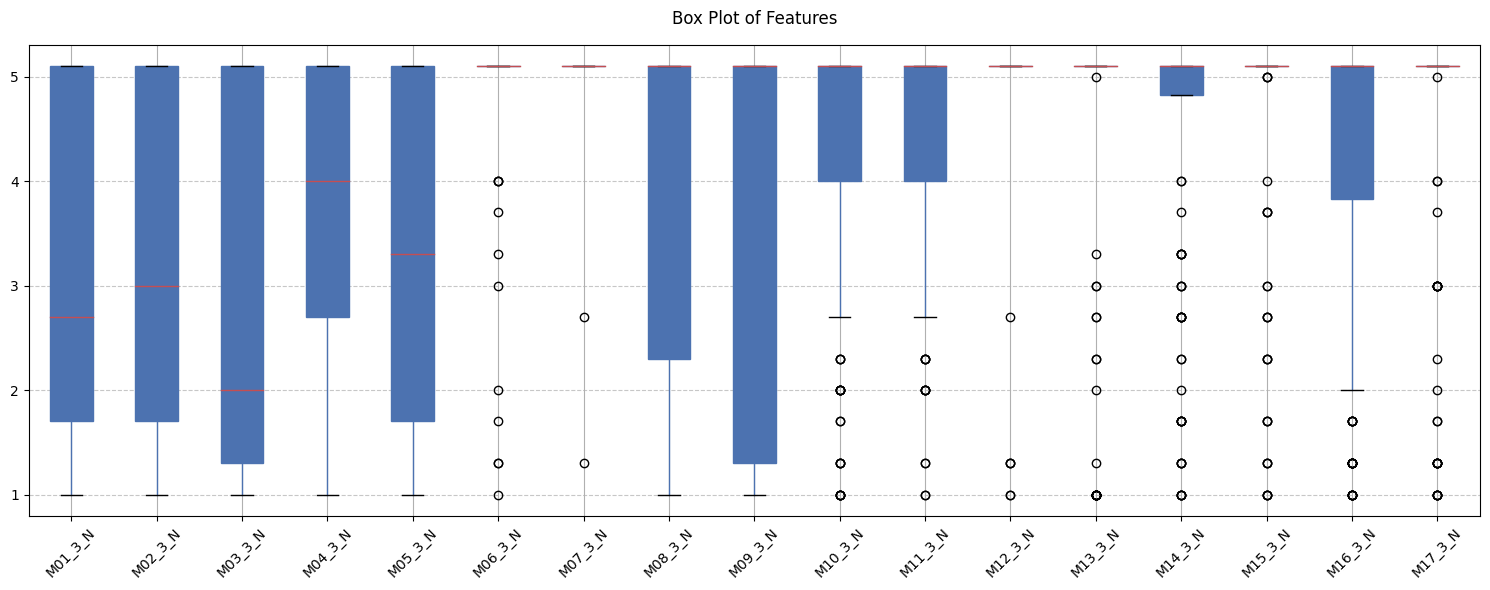

In [39]:
# Create boxplot visualization of BHT_3 grade distributions
# - Boxes show Q1, median, and Q3 for each module
# - Whiskers extend to min/max (excluding outliers)
# - Individual points mark statistical outliers
# - Allows easy comparison of grade distributions across modules
data_visualizer.create_boxplot(BHT_3)

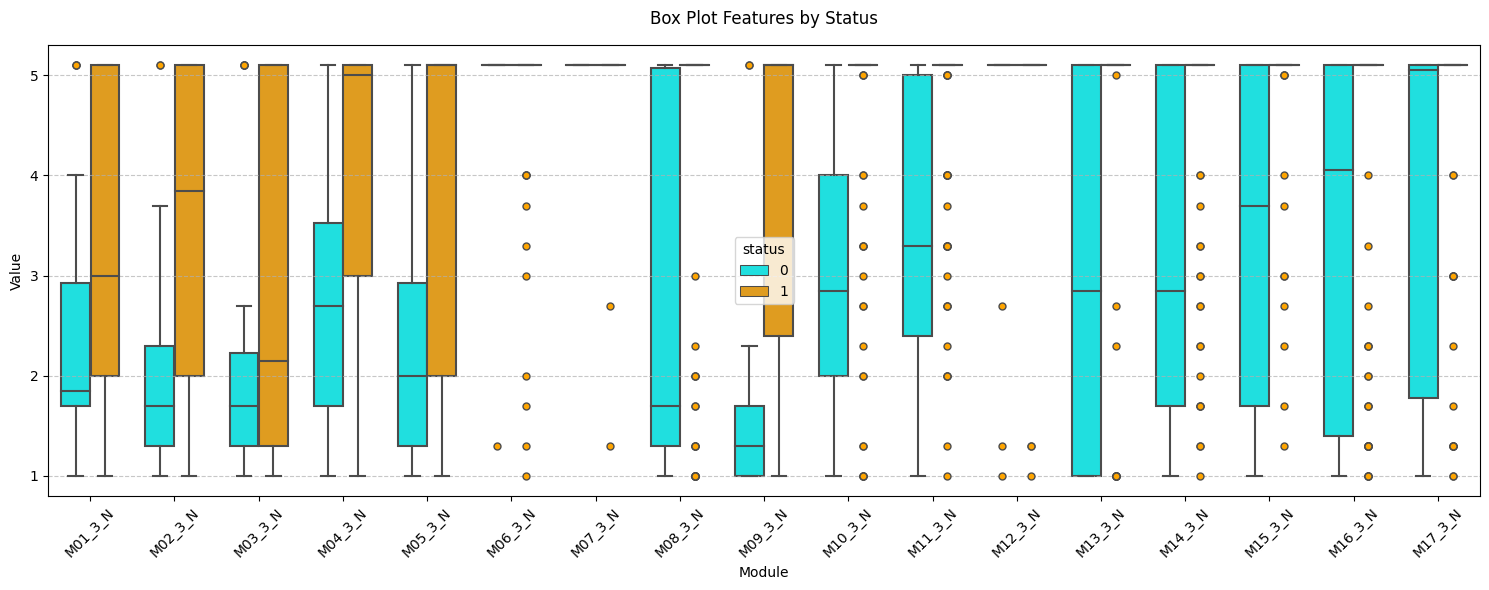

In [40]:

# Create comparative boxplots split by graduate/dropout status
# - Separate boxplots for graduates and dropouts
# - Shows how grade distributions differ between the groups
# - Helps identify if certain grade patterns predict graduation
# - Reveals modules with biggest performance gaps
data_visualizer.create_status_boxplot(BHT_3)

In [41]:
# Generate detailed statistics comparing graduates vs dropouts
# - Sample sizes show relative group proportions
# - Central tendencies reveal typical performance differences
# - Spread measures indicate grade consistency in each group
# - Quartiles show how grade distributions differ across groups
data_visualizer.get_status_statistics(BHT_3)

count   mean  median    std  min     q1     q3  max    iqr
feature status                                                            
M01_3_N 0          26  2.365    1.85  1.290  1.0  1.700  2.925  5.1  1.225
        1         114  3.345    3.00  1.528  1.0  2.000  5.100  5.1  3.100
M02_3_N 0          26  2.108    1.70  1.113  1.0  1.300  2.300  5.1  1.000
        1         114  3.523    3.85  1.562  1.0  2.000  5.100  5.1  3.100
M03_3_N 0          26  2.142    1.70  1.357  1.0  1.300  2.225  5.1  0.925
        1         114  3.077    2.15  1.809  1.0  1.300  5.100  5.1  3.800
M04_3_N 0          26  2.600    2.70  1.139  1.0  1.700  3.525  5.1  1.825
        1         114  3.976    5.00  1.369  1.0  3.000  5.100  5.1  2.100
M05_3_N 0          26  2.327    2.00  1.310  1.0  1.300  2.925  5.1  1.625
        1         114  3.683    5.10  1.640  1.0  2.000  5.100  5.1  3.100
M06_3_N 0          26  4.954    5.10  0.745  1.3  5.100  5.100  5.1  0.000
        1         114  4.898    5.10  0.735  1.0  5.100  5.100  5.1  0.000
M07_3_N 0          26  5.100    5.10  0.000  5.1  5.100  5.100  5.1  0.000
        1         114  5.046    5.10  0.419  1.3  5.100  5.100  5.1  0.000
M08_3_N 0          26  2.558    1.70  1.749  1.0  1.300  5.075  5.1  3.775
        1         114  4.495    5.10  1.378  1.0  5.100  5.100  5.1  0.000
M09_3_N 0          26  1.615    1.30  1.089  1.0  1.000  1.700  5.1  0.700
        1         114  4.045    5.10  1.655  1.0  2.400  5.100  5.1  2.700
M10_3_N 0          26  3.054    2.85  1.418  1.0  2.000  4.000  5.1  2.000
        1         114  4.668    5.10  1.081  1.0  5.100  5.100  5.1  0.000
M11_3_N 0          26  3.400    3.30  1.293  1.0  2.400  5.000  5.1  2.600
        1         114  4.700    5.10  0.920  1.0  5.100  5.100  5.1  0.000
M12_3_N 0          26  4.704    5.10  1.148  1.0  5.100  5.100  5.1  0.000
        1         114  4.997    5.10  0.627  1.0  5.100  5.100  5.1  0.000
M13_3_N 0          26  2.985    2.85  1.840  1.0  1.000  5.100  5.1  4.100
        1         114  4.802    5.10  1.035  1.0  5.100  5.100  5.1  0.000
M14_3_N 0          26  3.127    2.85  1.634  1.0  1.700  5.100  5.1  3.400
        1         114  4.689    5.10  1.020  1.0  5.100  5.100  5.1  0.000
M15_3_N 0          26  3.408    3.70  1.742  1.0  1.700  5.100  5.1  3.400
        1         114  4.930    5.10  0.654  1.3  5.100  5.100  5.1  0.000
M16_3_N 0          26  3.319    4.05  1.859  1.0  1.400  5.100  5.1  3.700
        1         114  4.425    5.10  1.391  1.0  5.100  5.100  5.1  0.000
M17_3_N 0          26  3.627    5.05  1.744  1.0  1.775  5.100  5.1  3.325
        1         114  4.714    5.10  1.066  1.0  5.100  5.100  5.1  0.000

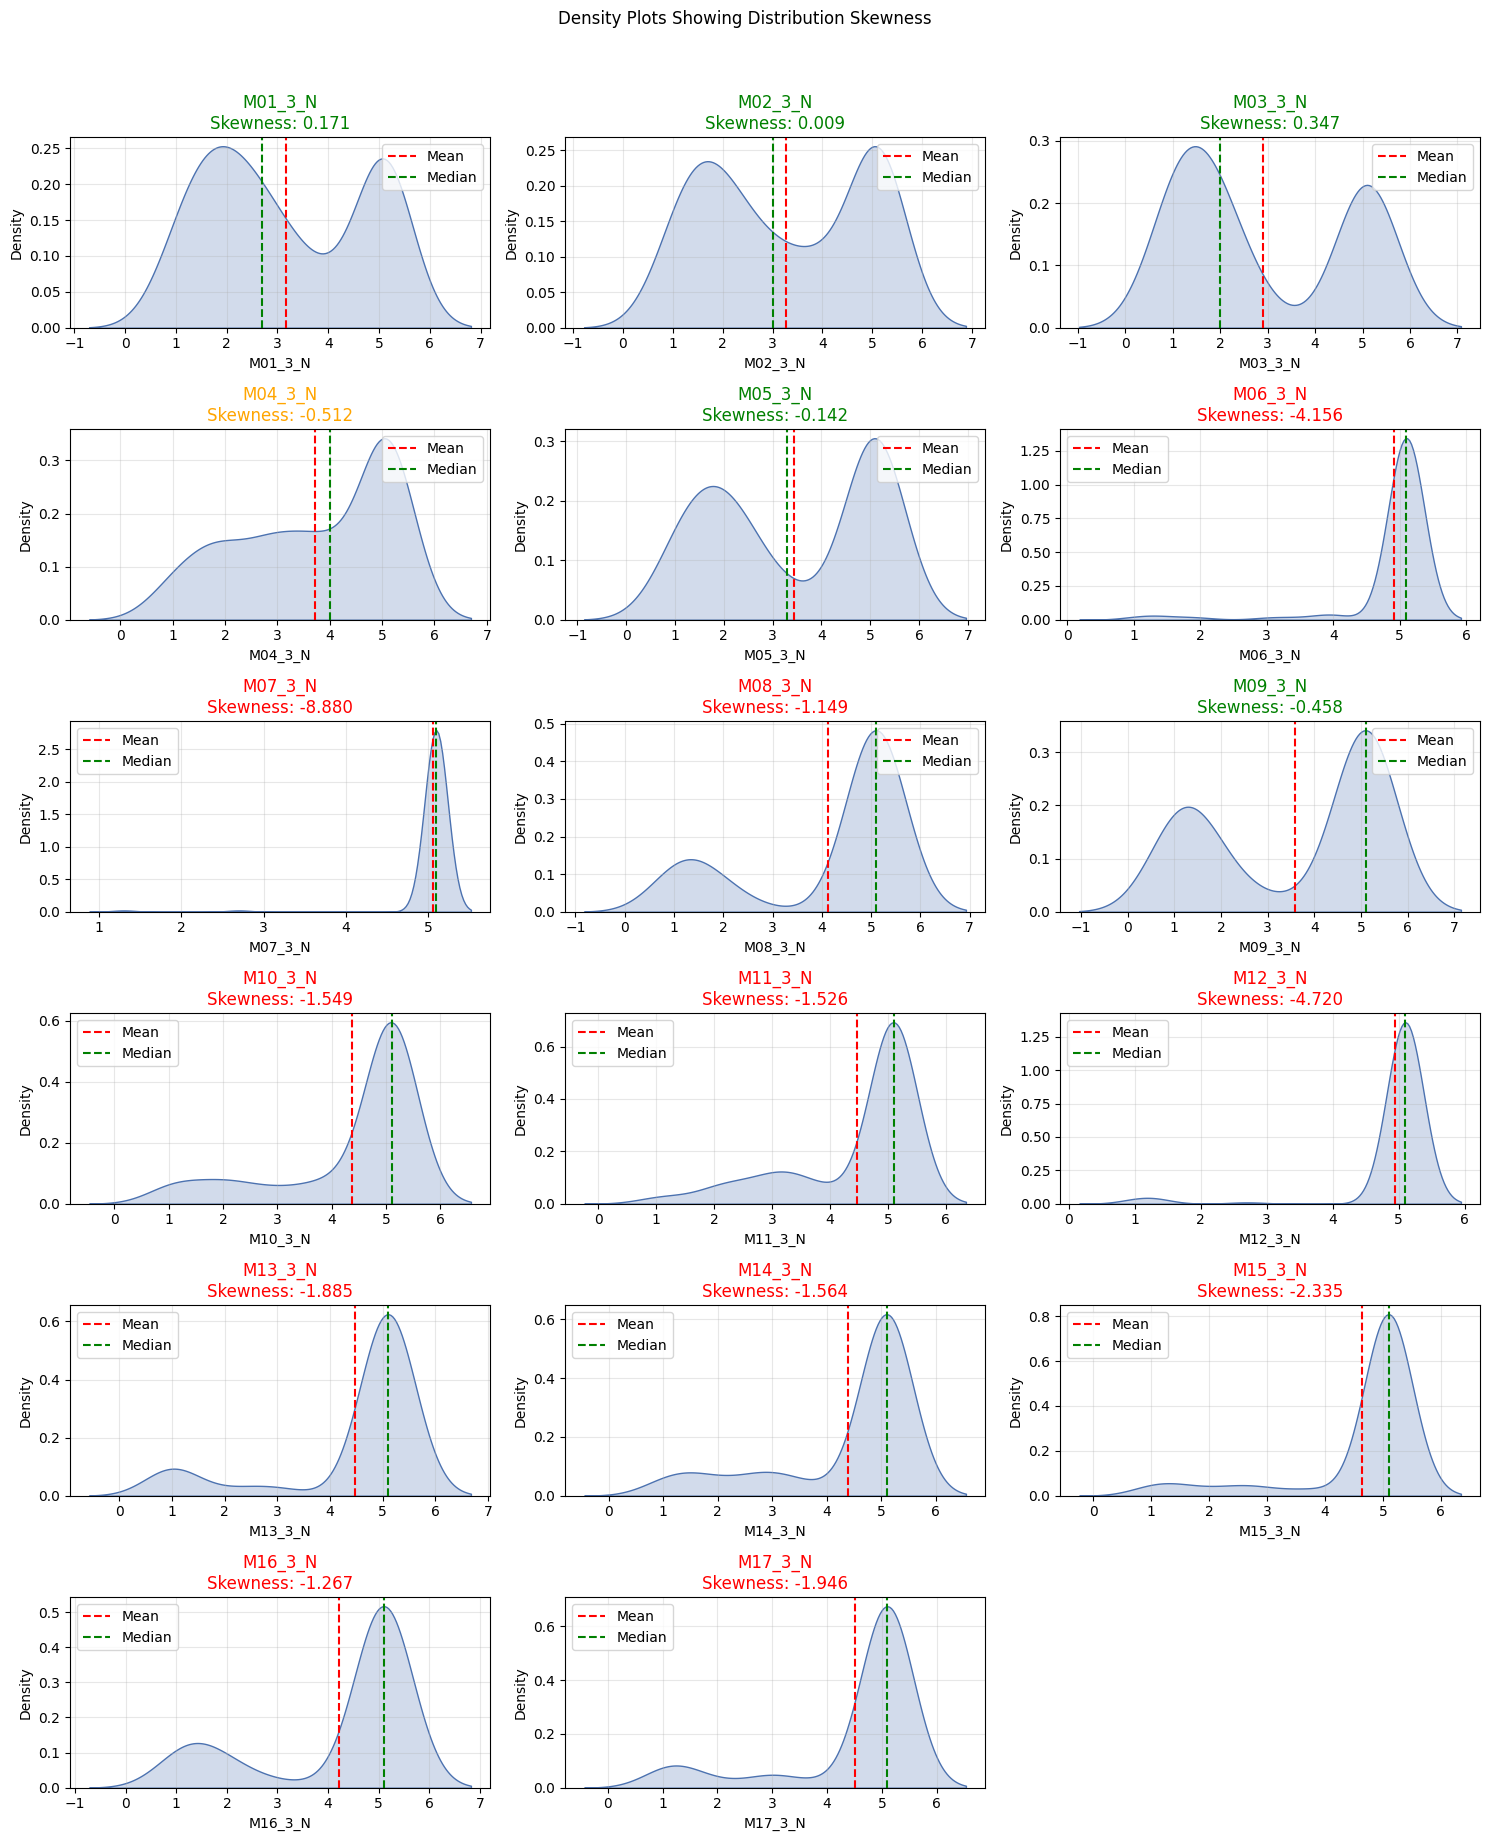

In [42]:
# Visualize grade distributions with density plots and skewness indicators
# - Density curves show overall shape of grade distributions
# - Skewness arrows indicate direction and degree of asymmetry
# - Multiple modules plotted together for comparison
# - Helps identify unusual distribution patterns
data_visualizer.plot_density_skewness(BHT_3)


In [43]:
# Analyze distribution shapes through skewness and kurtosis measures
# - Skewness quantifies asymmetry (negative = left tail, positive = right tail)
# - Kurtosis measures tail weight and peak sharpness
# - Helps identify modules with unusual grade distributions
# - Provides statistical validation of visual patterns
data_visualizer.calculate_distribution_shape(BHT_3)


Feature  Skewness             Skewness_Interpretation  Kurtosis  \
0   M01_3_N     0.171             Approximately Symmetric    -1.548   
1   M02_3_N     0.009             Approximately Symmetric    -1.660   
2   M03_3_N     0.347             Approximately Symmetric    -1.732   
3   M04_3_N    -0.512     Moderately Negative (Left Tail)    -1.173   
4   M05_3_N    -0.142             Approximately Symmetric    -1.772   
5   M06_3_N    -4.156  Highly Negative (Strong Left Tail)    16.930   
6   M07_3_N    -8.880  Highly Negative (Strong Left Tail)    80.922   
7   M08_3_N    -1.149  Highly Negative (Strong Left Tail)    -0.606   
8   M09_3_N    -0.458             Approximately Symmetric    -1.718   
9   M10_3_N    -1.549  Highly Negative (Strong Left Tail)     0.886   
10  M11_3_N    -1.526  Highly Negative (Strong Left Tail)     1.077   
11  M12_3_N    -4.720  Highly Negative (Strong Left Tail)    20.903   
12  M13_3_N    -1.885  Highly Negative (Strong Left Tail)     1.774   
13  M14_3_N    -1.564  Highly Negative (Strong Left Tail)     0.896   
14  M15_3_N    -2.335  Highly Negative (Strong Left Tail)     4.026   
15  M16_3_N    -1.267  Highly Negative (Strong Left Tail)    -0.268   
16  M17_3_N    -1.946  Highly Negative (Strong Left Tail)     2.168   

                 Kurtosis_Interpretation  
0   Very Platykurtic (Very Light-tailed)  
1   Very Platykurtic (Very Light-tailed)  
2   Very Platykurtic (Very Light-tailed)  
3   Very Platykurtic (Very Light-tailed)  
4   Very Platykurtic (Very Light-tailed)  
5             Leptokurtic (Heavy-tailed)  
6             Leptokurtic (Heavy-tailed)  
7             Platykurtic (Light-tailed)  
8   Very Platykurtic (Very Light-tailed)  
9             Mesokurtic (Normal-tailed)  
10            Leptokurtic (Heavy-tailed)  
11            Leptokurtic (Heavy-tailed)  
12            Leptokurtic (Heavy-tailed)  
13            Mesokurtic (Normal-tailed)  
14            Leptokurtic (Heavy-tailed)  
15            Platykurtic (Light-tailed)  
16            Leptokurtic (Heavy-tailed)

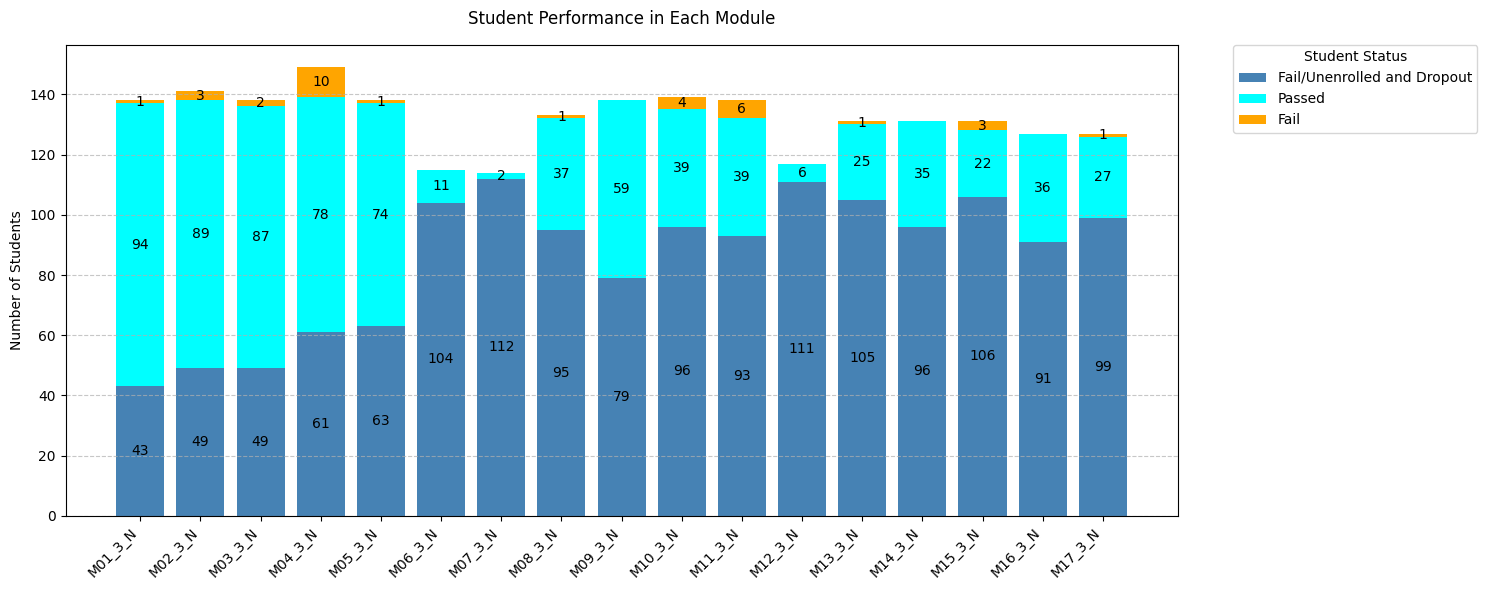

In [44]:
# Create stacked bar visualization of pass/fail rates
# - Shows absolute numbers of students in each category
# - Breaks down passing/failing students by graduate status
# - Reveals modules with highest failure rates
# - Indicates relationship between module success and graduation
data_visualizer.plot_bar_matplotlib(BHT_3)

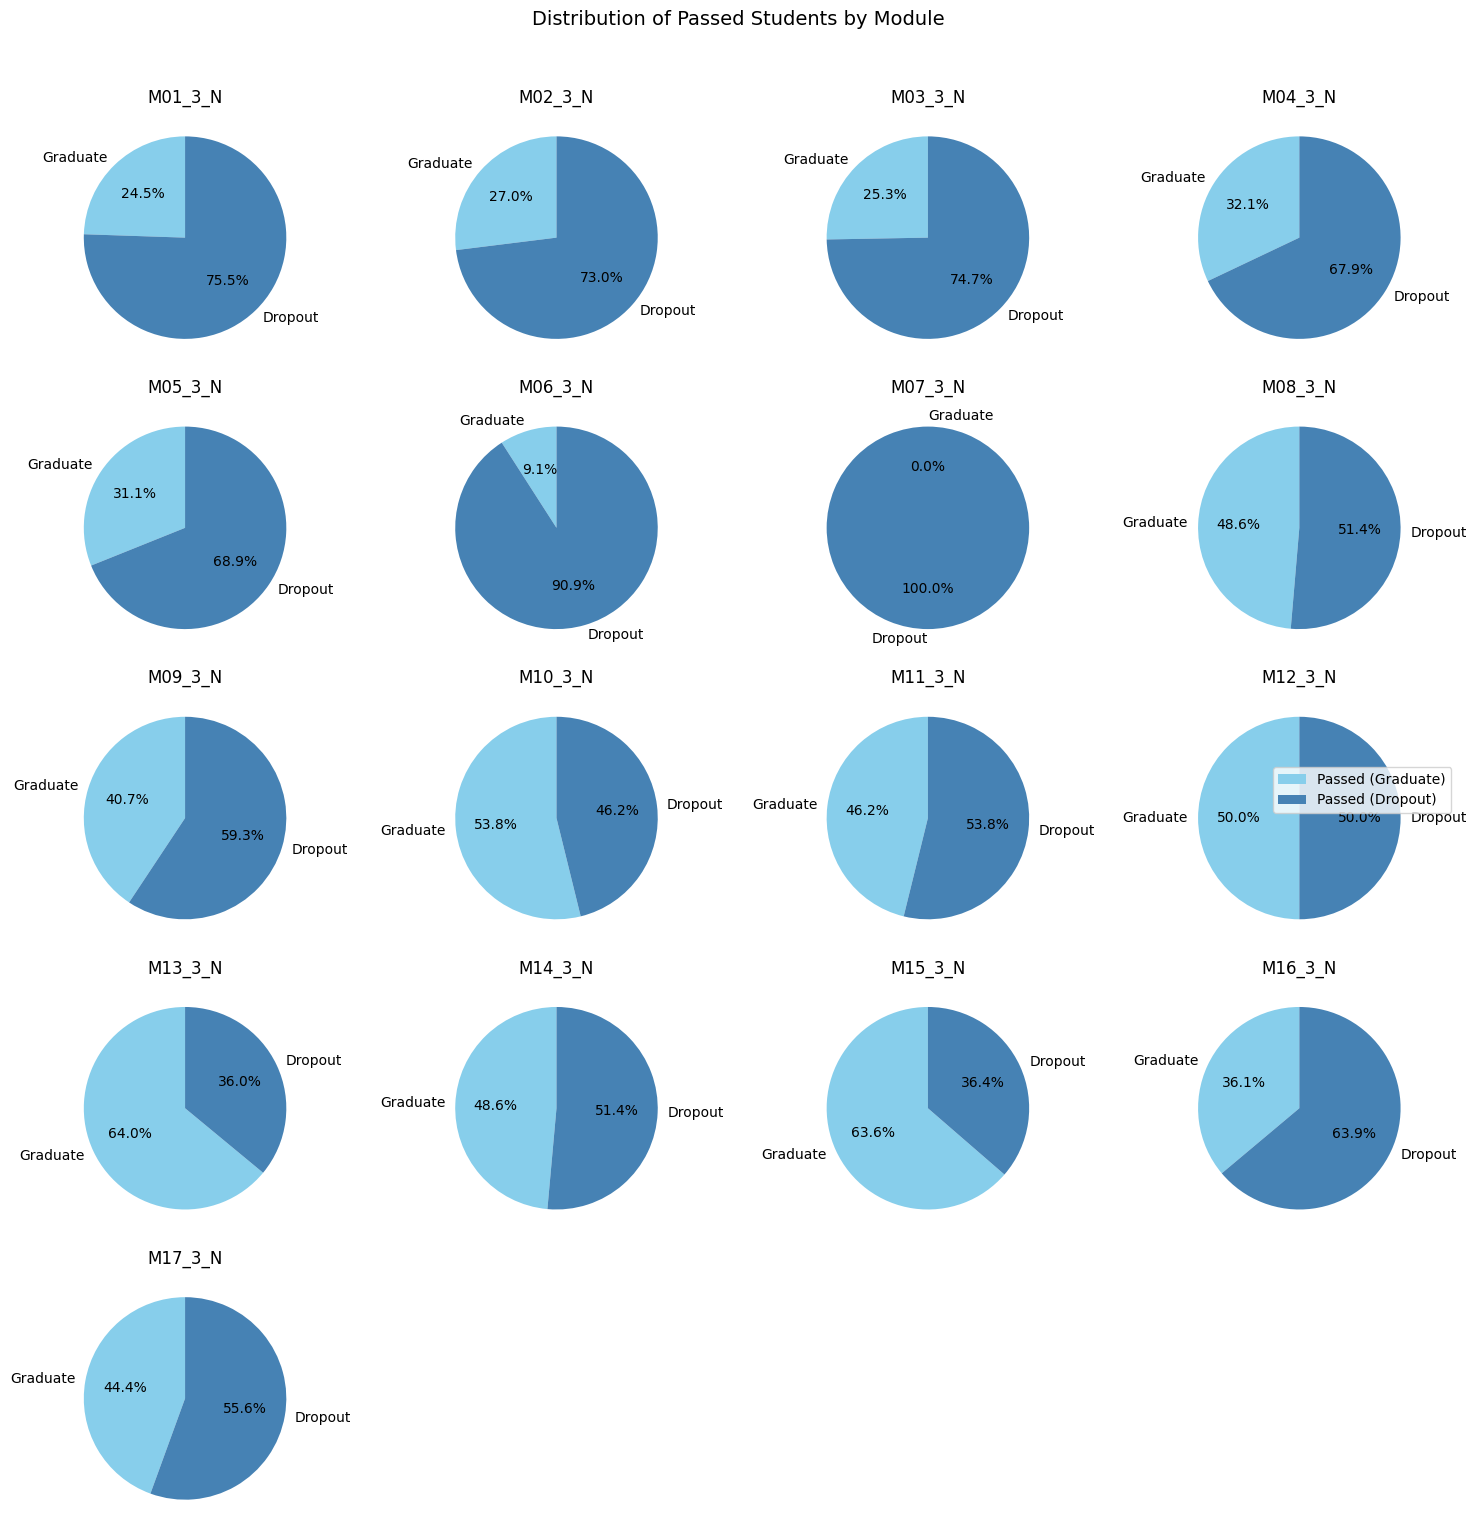

In [45]:
# Generate pie charts analyzing passing students
# - Separate chart for each module
# - Shows proportion of graduates vs dropouts among passing students
# - Helps identify if passing grades predict graduation
# - Reveals modules where passing students still tend to dropout
data_visualizer.plot_passed_students_pie(BHT_3)

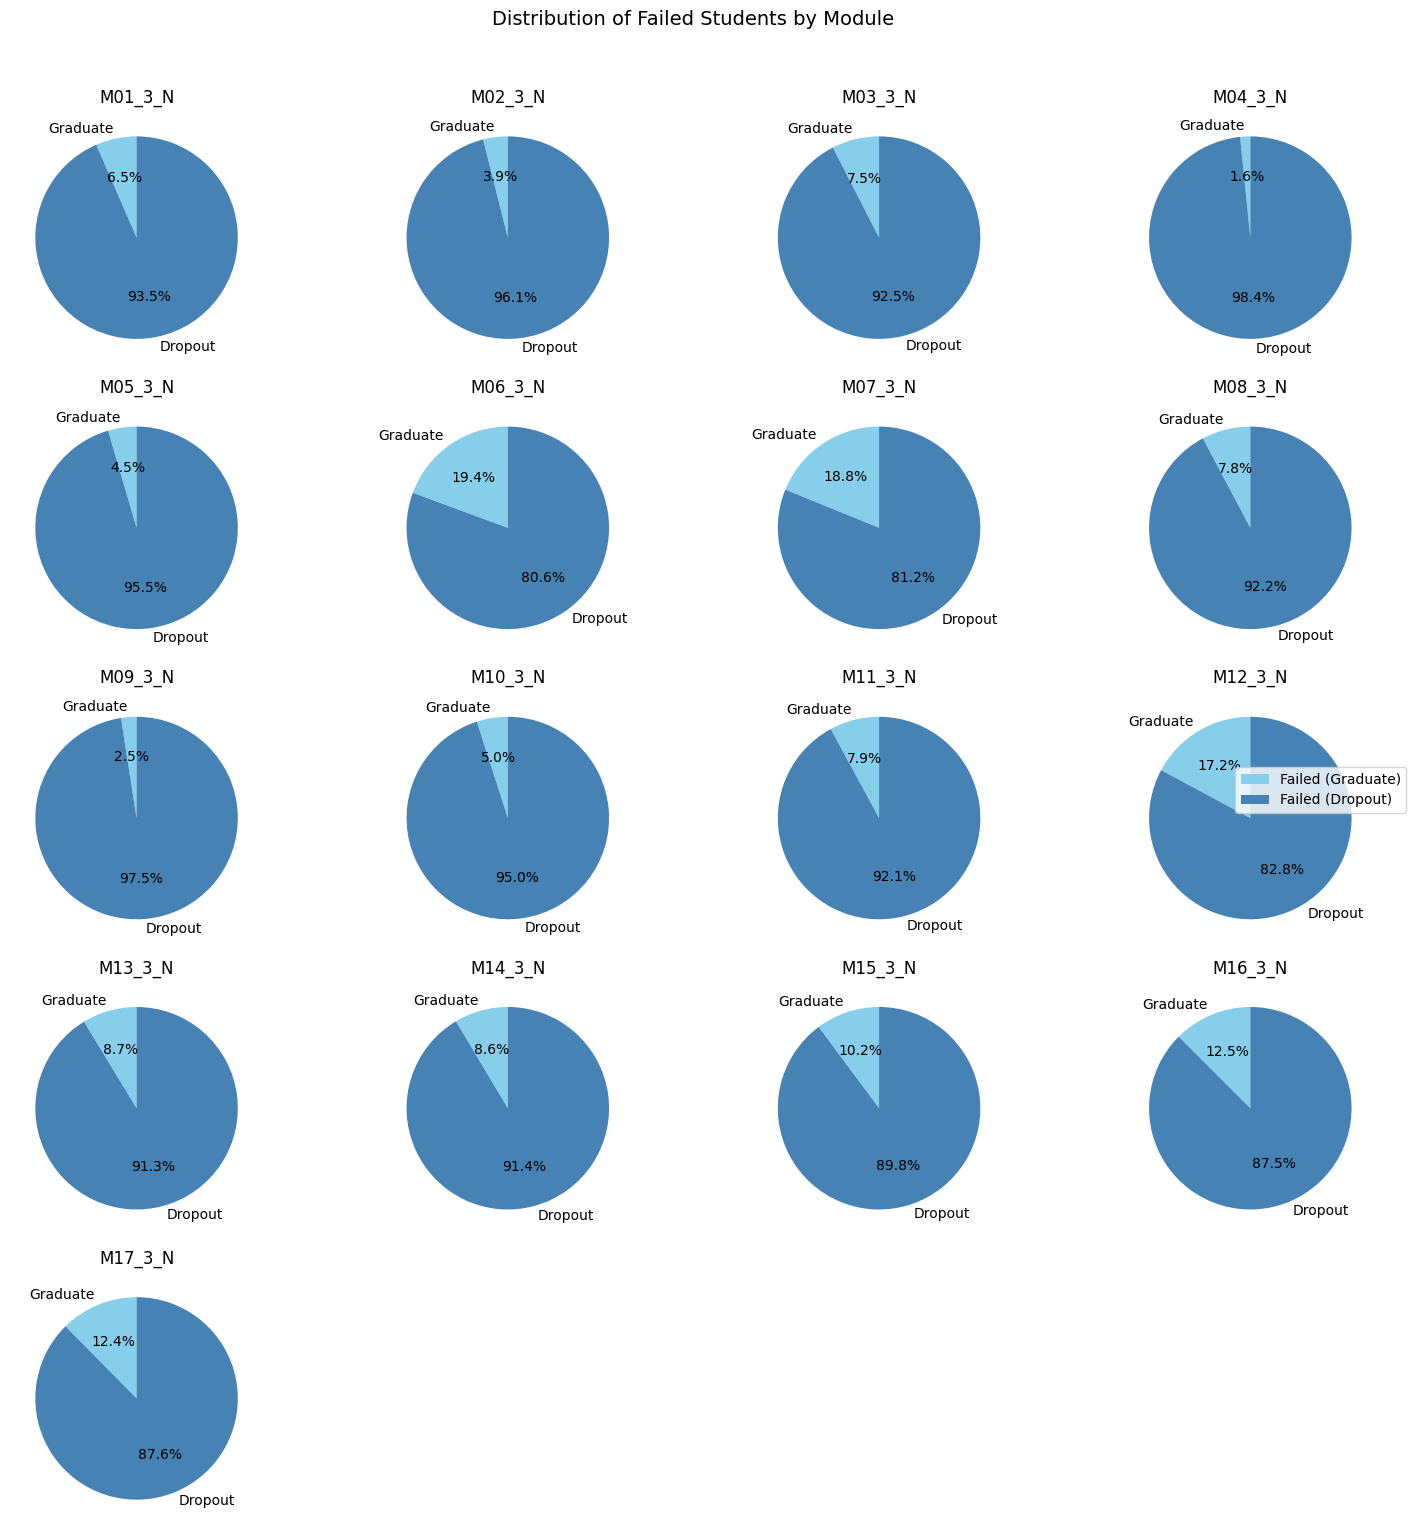

In [46]:
# Generate pie charts analyzing failing students
# - Separate chart for each module
# - Shows proportion of graduates vs dropouts among failing students
# - Helps identify if failing grades predict dropout
# - Reveals modules where failing students still manage to graduate
data_visualizer.plot_failed_students_pie(BHT_3)

## Analysis on THL data

In [47]:
# Read BHT1 dataset from CSV file with semicolon separator
THL_1 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL1.csv', sep=';')
# Remove the automatically generated index column
THL_1.drop(columns=['Unnamed: 0'], inplace=True)

# Read BHT2 dataset from CSV file with semicolon separator
THL_2 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL2.csv', sep=';')
# Remove the automatically generated index column
THL_2.drop(columns=['Unnamed: 0'], inplace=True)

# Read BHT3 dataset from CSV file with comma separator
THL_3 = pd.read_csv('/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL3.csv', sep=',')


In [48]:
print(THL_1.corrwith(THL_1['status'], method='spearman'))
THL_1.corr(method='spearman').style.background_gradient(cmap='Blues')

M01_1_N    0.438883
M02_1_N    0.422447
M03_1_N    0.334467
M04_1_N    0.467371
M05_1_N    0.401867
M06_1_N    0.329188
status     1.000000
dtype: float64


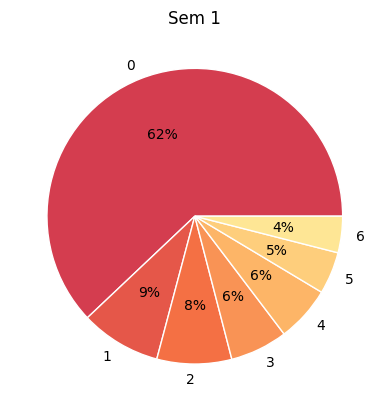

Distribution of students by number of modules enrolled:


Number of Modules  Percentage (%)
0                 0            62.0
1                 1             9.0
2                 2             8.0
3                 3             6.0
4                 4             6.0
5                 5             4.0
6                 6             5.0
7       More than 6             0.0

Text(0, 0.5, '')

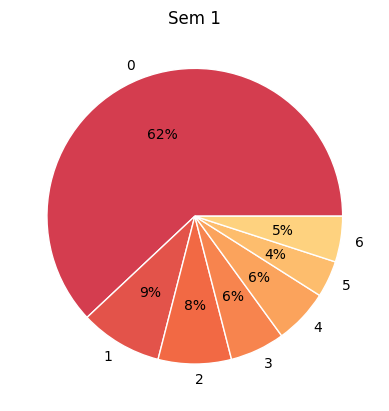

In [49]:
THL_1_count_subjects_per_student = count_subjects_per_student(THL_1)
plot_passed_courses_distribution(THL_1_count_subjects_per_student, 'enrolled_subjects', 'Sem 1')
module_counts =THL_1_count_subjects_per_student['enrolled_subjects'].value_counts().sort_index()

# Create a modified version where modules > 6 are grouped together
modified_counts = module_counts.copy()
more_than_6 = module_counts[module_counts.index > 6].sum()
modified_counts = modified_counts[modified_counts.index <= 6]
modified_counts.loc['More than 6'] = more_than_6

# Calculate the percentage of students enrolled in each module
total_students = len(THL_1_count_subjects_per_student)
module_percentages = (modified_counts / total_students * 100).round(0)

# Create a DataFrame to display the results
module_distribution = pd.DataFrame({
    'Number of Modules': modified_counts.index,
    'Percentage (%)': module_percentages.values
})

# Display the table
print("Distribution of students by number of modules enrolled:")
display(module_distribution)
module_distribution['Percentage (%)'].iloc[0:7].plot(kind='pie', autopct='%1.0f%%', colors=plt.cm.Spectral(np.linspace(0.1, 0.42, len(module_distribution))), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Sem 1')
plt.ylabel('')

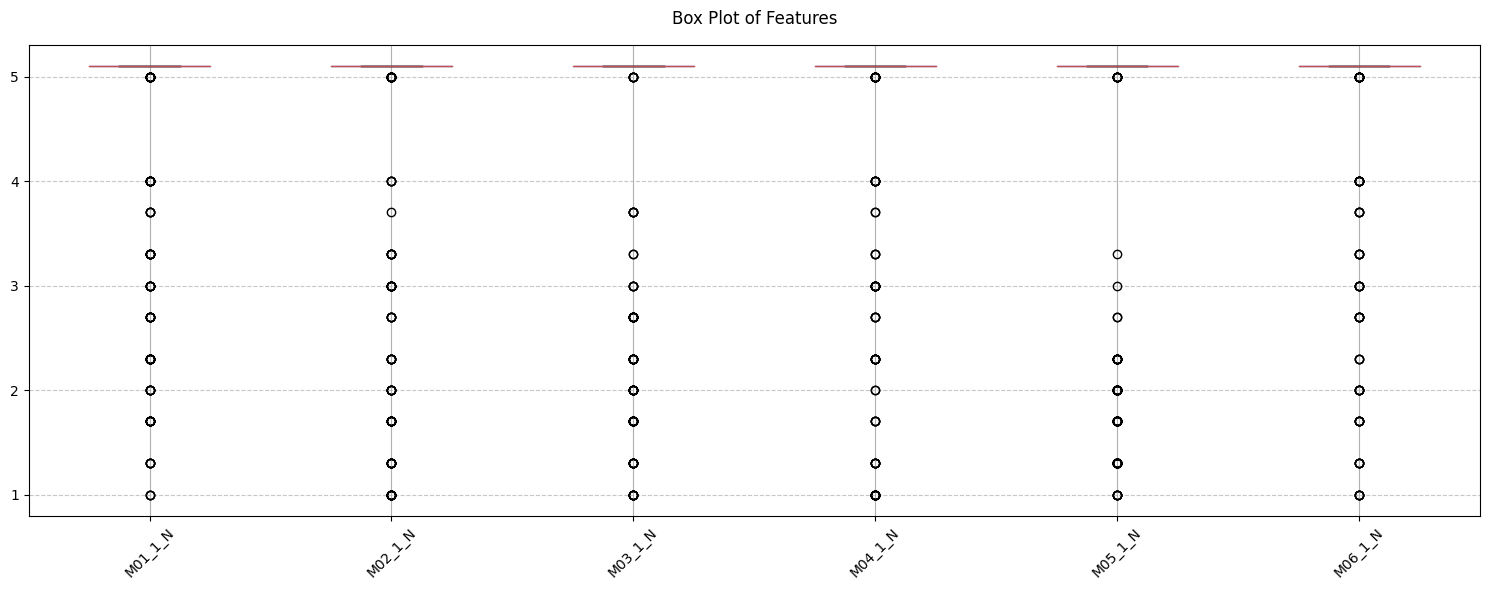

In [50]:
# Create a boxplot visualization of all features in THL_1 dataset
# This visualization helps compare the distribution of scores across all modules in THL_1 dataset
data_visualizer.create_boxplot(THL_1)

In [51]:
# Calculate central tendency measures (mean, median, mode) for THL_1 dataset
# This helps identify the typical performance level across all modules in THL_1 dataset
# Mean shows the average grade across all students
# Median indicates the middle value, less affected by outliers
# Mode reveals the most frequently occurring grade
# This combination helps identify typical performance and any grade clustering
data_visualizer.calculate_central_tendency(THL_1)


Feature   Mean  Median   Mode
0  M01_1_N  4.671     5.1  5.100
1  M02_1_N  4.571     5.1  5.100
2  M03_1_N  4.572     5.1  5.100
3  M04_1_N  4.709     5.1  5.100
4  M05_1_N  4.330     5.1  5.100
5  M06_1_N  4.809     5.1  5.100

In [52]:
# Calculate dispersion measures (range, variance, standard deviation, IQR) for THL_1 dataset
# This helps understand the spread of grades across all modules in THL_1 dataset
# Range shows the full spread from lowest to highest grade
# Variance measures average squared deviation from the mean
# Standard deviation gives spread in same units as grades
# IQR shows spread of middle 50% of grades, robust to outliers
data_visualizer.calculate_dispersion_measures(THL_1)

Feature  Range  Variance  Std_Dev  IQR
0  M01_1_N    4.1     1.005    1.002  0.0
1  M02_1_N    4.1     1.445    1.202  0.0
2  M03_1_N    4.1     1.412    1.188  0.0
3  M04_1_N    4.1     1.121    1.059  0.0
4  M05_1_N    4.1     2.059    1.435  0.0
5  M06_1_N    4.1     0.759    0.871  0.0

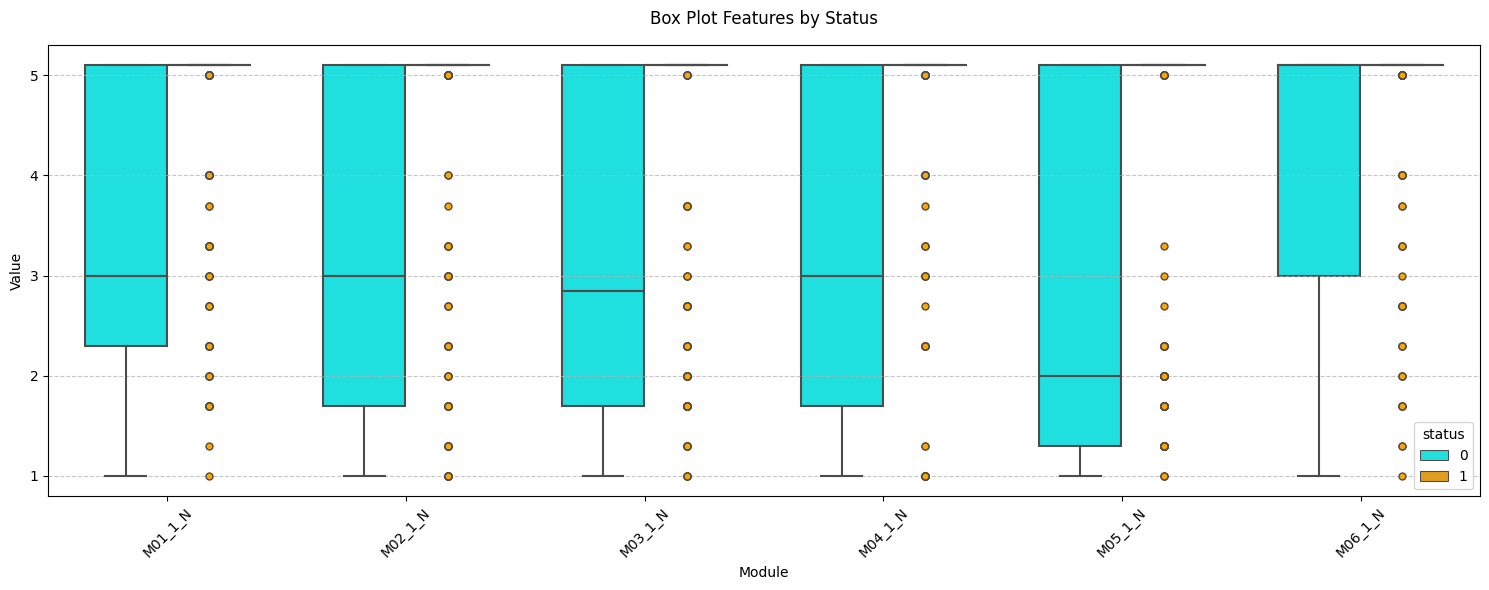

In [53]:
# Create a boxplot visualization comparing feature distributions between student status groups
# This helps compare the distribution of scores across different student status groups in THL_1 dataset
data_visualizer.create_status_boxplot(THL_1)

In [54]:
# Get detailed statistics broken down by student status for THL_1 dataset
# This provides a comprehensive overview of performance differences between different student groups
data_visualizer.get_status_statistics(THL_1)

count   mean  median    std  min   q1   q3  max  iqr
feature status                                                      
M01_1_N 0          54  3.352    3.00  1.466  1.0  2.3  5.1  5.1  2.8
        1         423  4.840    5.10  0.782  1.0  5.1  5.1  5.1  0.0
M02_1_N 0          54  3.056    3.00  1.642  1.0  1.7  5.1  5.1  3.4
        1         423  4.764    5.10  0.979  1.0  5.1  5.1  5.1  0.0
M03_1_N 0          54  3.420    2.85  1.694  1.0  1.7  5.1  5.1  3.4
        1         423  4.719    5.10  1.020  1.0  5.1  5.1  5.1  0.0
M04_1_N 0          54  3.267    3.00  1.707  1.0  1.7  5.1  5.1  3.4
        1         423  4.893    5.10  0.774  1.0  5.1  5.1  5.1  0.0
M05_1_N 0          54  2.685    2.00  1.616  1.0  1.3  5.1  5.1  3.8
        1         423  4.540    5.10  1.266  1.0  5.1  5.1  5.1  0.0
M06_1_N 0          54  3.889    5.10  1.529  1.0  3.0  5.1  5.1  2.1
        1         423  4.927    5.10  0.664  1.0  5.1  5.1  5.1  0.0

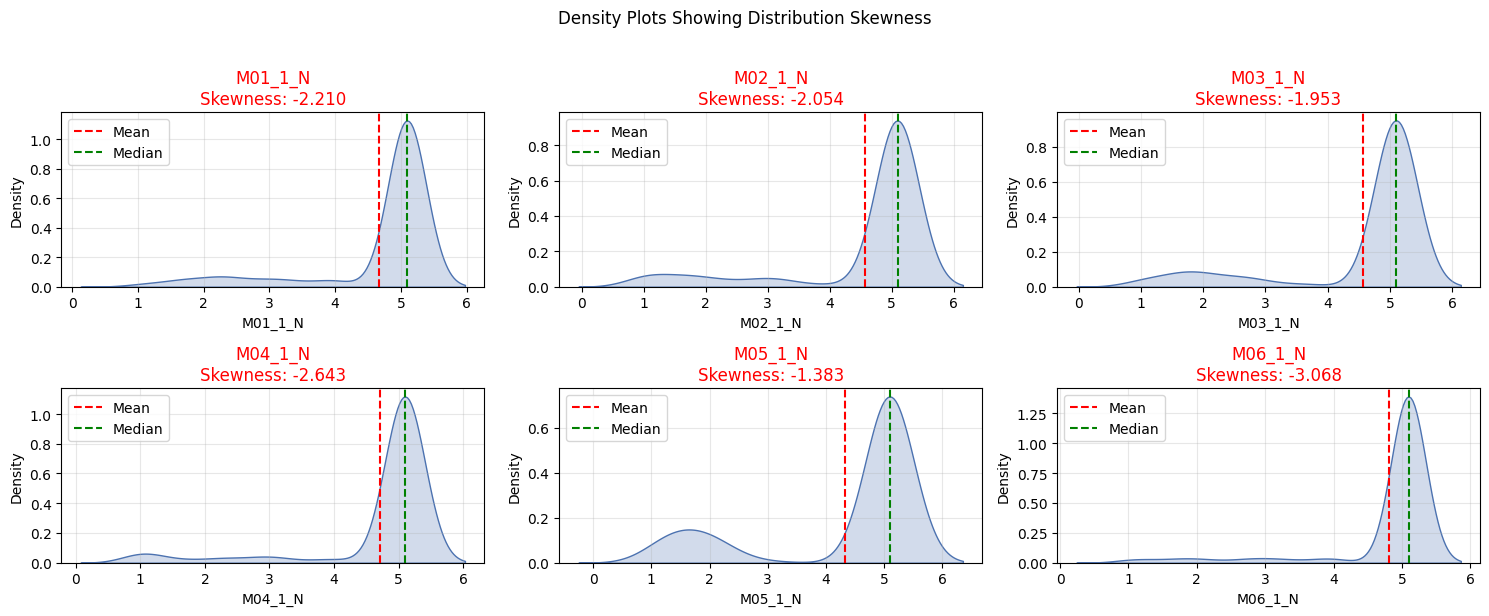

In [55]:
# Create density plots showing distribution skewness for THL_1 dataset
# This helps analyze the shape and symmetry of score distributions
# by displaying density curves with mean and median markers for each module
data_visualizer.plot_density_skewness(THL_1)

In [56]:
# Calculate skewness and kurtosis measures to understand the shape of distributions
# Skewness indicates asymmetry (negative = left tail, positive = right tail)
# Kurtosis indicates tail weight/peak (higher = heavier tails/sharper peak)
data_visualizer.calculate_distribution_shape(THL_1)

Feature  Skewness             Skewness_Interpretation  Kurtosis  \
0  M01_1_N    -2.210  Highly Negative (Strong Left Tail)     3.501   
1  M02_1_N    -2.054  Highly Negative (Strong Left Tail)     2.618   
2  M03_1_N    -1.953  Highly Negative (Strong Left Tail)     2.128   
3  M04_1_N    -2.643  Highly Negative (Strong Left Tail)     5.603   
4  M05_1_N    -1.383  Highly Negative (Strong Left Tail)     0.014   
5  M06_1_N    -3.068  Highly Negative (Strong Left Tail)     8.373   

      Kurtosis_Interpretation  
0  Leptokurtic (Heavy-tailed)  
1  Leptokurtic (Heavy-tailed)  
2  Leptokurtic (Heavy-tailed)  
3  Leptokurtic (Heavy-tailed)  
4  Mesokurtic (Normal-tailed)  
5  Leptokurtic (Heavy-tailed)

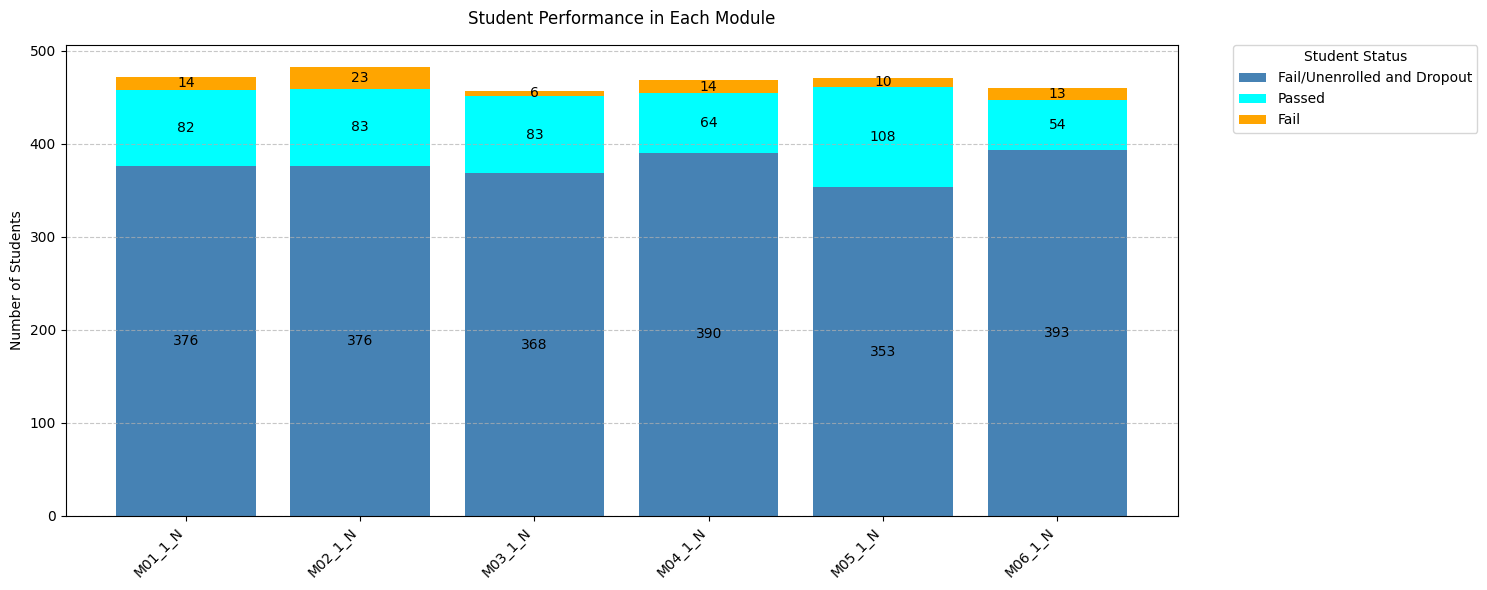

In [57]:
# Create a stacked bar plot showing the distribution of student performance across modules
# This visualization displays:
# - Number of students who passed each module
# - Number of students who failed each module
# - Breakdown by graduate vs dropout status
data_visualizer.plot_bar_matplotlib(THL_1)

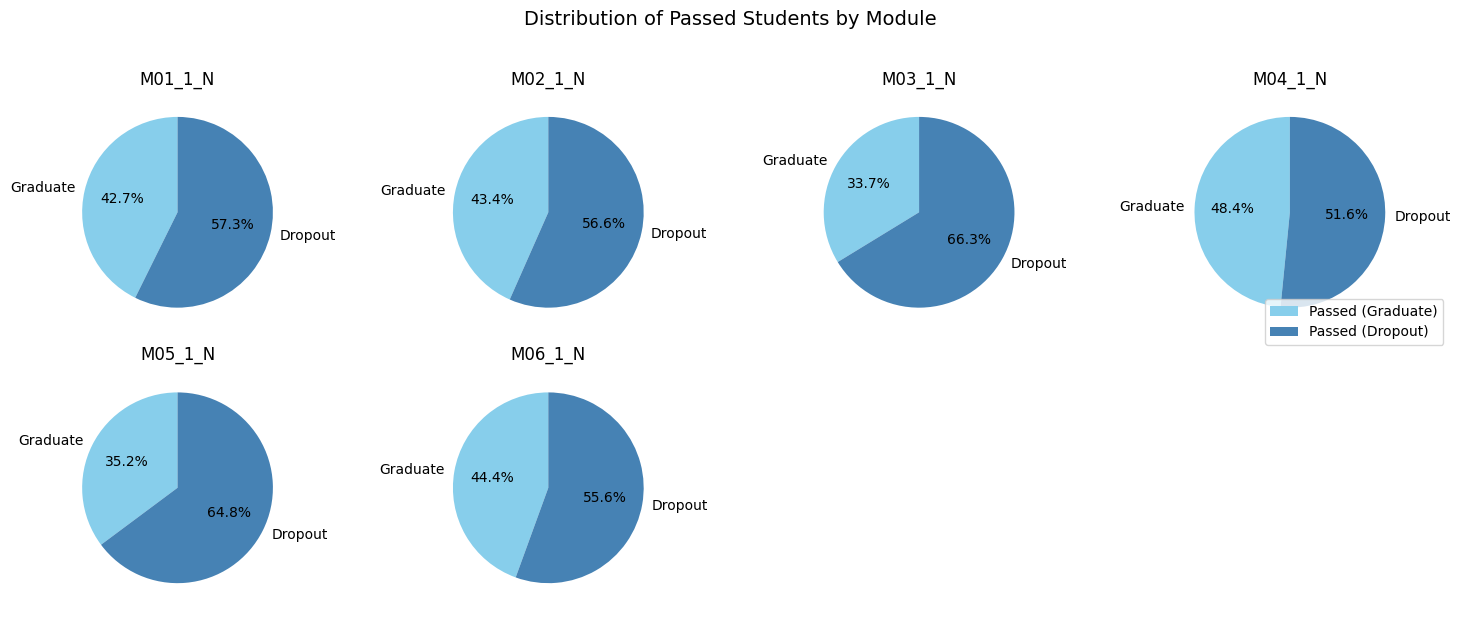

In [58]:
# Create a pie chart showing the distribution of passed students across modules
# This visualization displays:
# - Percentage of graduates vs dropouts among students who passed each module
# - Helps identify if passing students tend to graduate or dropout
data_visualizer.plot_passed_students_pie(THL_1)

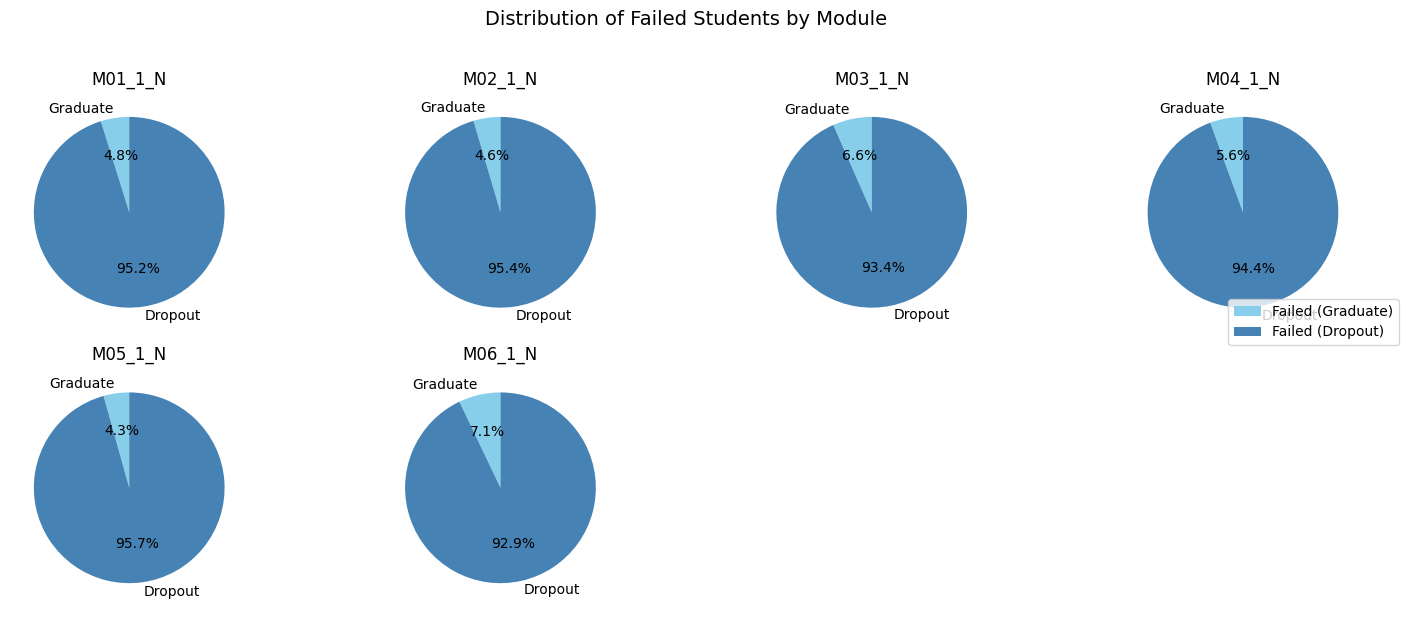

In [59]:
# Create a pie chart showing the distribution of failed students across modules
# This visualization displays:
# - Percentage of graduates vs dropouts among students who failed each module
# - Helps identify if failing students tend to graduate or dropout
data_visualizer.plot_failed_students_pie(THL_1)

### THL 2

In [60]:
print(THL_2.corrwith(THL_2['status'], method='spearman'))
THL_2.corr(method='spearman').style.background_gradient(cmap='Blues')

M01_2_N    0.464357
M02_2_N    0.485315
M03_2_N    0.359114
M04_2_N    0.465039
M05_2_N    0.375693
M06_2_N    0.421405
M07_2_N    0.479477
M08_2_N    0.401712
M09_2_N    0.417695
M10_2_N    0.491153
M11_2_N    0.583476
M12_2_N    0.069564
status     1.000000
dtype: float64


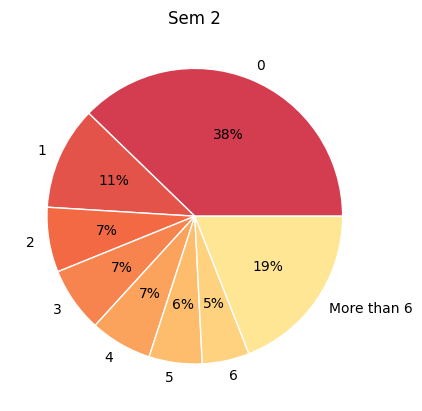

Distribution of students by number of modules enrolled:


Number of Modules  Percentage (%)
Number of Modules                                  
0                                 0            38.0
1                                 1             7.0
2                                 2             5.0
3                                 3            11.0
4                                 4             7.0
5                                 5             5.0
6                                 6             7.0
More than 6             More than 6            20.0

Text(0, 0.5, '')

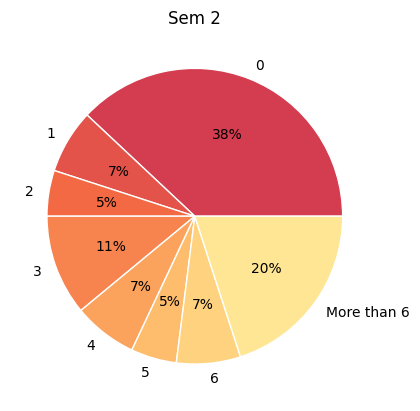

In [61]:
THL_2_count_subjects_per_student = count_subjects_per_student(THL_2)
plot_passed_courses_distribution(THL_2_count_subjects_per_student, 'enrolled_subjects', 'Sem 2')
module_counts = THL_2_count_subjects_per_student['enrolled_subjects'].value_counts().sort_index()

# Create a modified version where modules > 6 are grouped together
modified_counts = module_counts.copy()
more_than_6 = module_counts[module_counts.index > 6].sum()
modified_counts = modified_counts[modified_counts.index <= 6]
modified_counts.loc['More than 6'] = more_than_6

# Calculate the percentage of students enrolled in each module
total_students = len(THL_2_count_subjects_per_student)
module_percentages = (modified_counts / total_students * 100).round(0)

# Create a DataFrame to display the results
module_distribution = pd.DataFrame({
    'Number of Modules': modified_counts.index,
    'Percentage (%)': module_percentages.values
})
module_distribution.index = module_distribution['Number of Modules']
# Display the table
print("Distribution of students by number of modules enrolled:")
display(module_distribution)
module_distribution['Percentage (%)'].plot(kind='pie', autopct='%1.0f%%', colors=plt.cm.Spectral(np.linspace(0.1, 0.42, len(module_distribution))), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Sem 2')
plt.ylabel('')

In [62]:
# Calculate measures of central tendency (mean, median, mode) for THL_2 dataset
# This helps identify the typical performance level across all modules in THL_2 dataset
# Mean shows the average grade across all students
# Median indicates the middle value, less affected by outliers  
# Mode reveals the most frequently occurring grade
# This combination helps identify typical performance and any grade clustering
data_visualizer.calculate_central_tendency(THL_2)

Feature   Mean  Median   Mode
0   M01_2_N  4.176     5.1  5.100
1   M02_2_N  4.100     5.1  5.100
2   M03_2_N  3.921     5.1  5.100
3   M04_2_N  4.301     5.1  5.100
4   M05_2_N  3.791     5.1  5.100
5   M06_2_N  4.438     5.1  5.100
6   M07_2_N  4.779     5.1  5.100
7   M08_2_N  4.424     5.1  5.100
8   M09_2_N  4.455     5.1  5.100
9   M10_2_N  4.800     5.1  5.100
10  M11_2_N  4.719     5.1  5.100
11  M12_2_N  5.085     5.1  5.100

In [63]:
# Calculate dispersion measures (range, variance, standard deviation, IQR) for THL_2 dataset
# This helps understand the spread of grades across all modules in THL_2 dataset
# Range shows the full spread from lowest to highest grade
# Variance measures average squared deviation from the mean
# Standard deviation gives spread in same units as grades
# IQR shows spread of middle 50% of grades, robust to outliers
data_visualizer.calculate_dispersion_measures(THL_2)

Feature  Range  Variance  Std_Dev   IQR
0   M01_2_N    4.1     1.684    1.298  2.10
1   M02_2_N    4.1     2.211    1.487  2.10
2   M03_2_N    4.1     2.431    1.559  2.80
3   M04_2_N    4.1     1.846    1.358  1.40
4   M05_2_N    4.1     2.770    1.664  3.10
5   M06_2_N    4.1     1.524    1.234  0.85
6   M07_2_N    4.1     0.976    0.988  0.00
7   M08_2_N    4.1     1.967    1.402  0.00
8   M09_2_N    4.1     1.601    1.265  0.00
9   M10_2_N    4.1     0.884    0.940  0.00
10  M11_2_N    4.1     1.047    1.023  0.00
11  M12_2_N    3.1     0.037    0.193  0.00

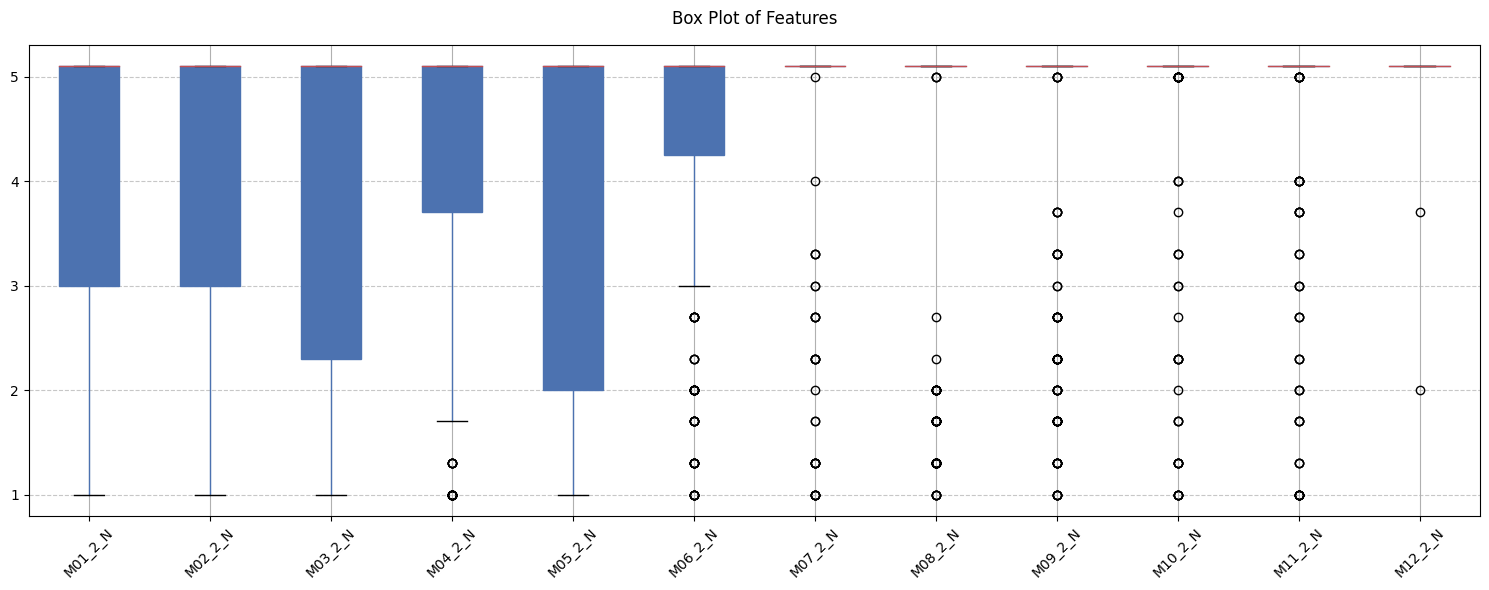

In [64]:
# Create a boxplot visualization of THL_2 dataset
# This helps compare the distribution of scores across all modules in THL_2 dataset
data_visualizer.create_boxplot(THL_2)

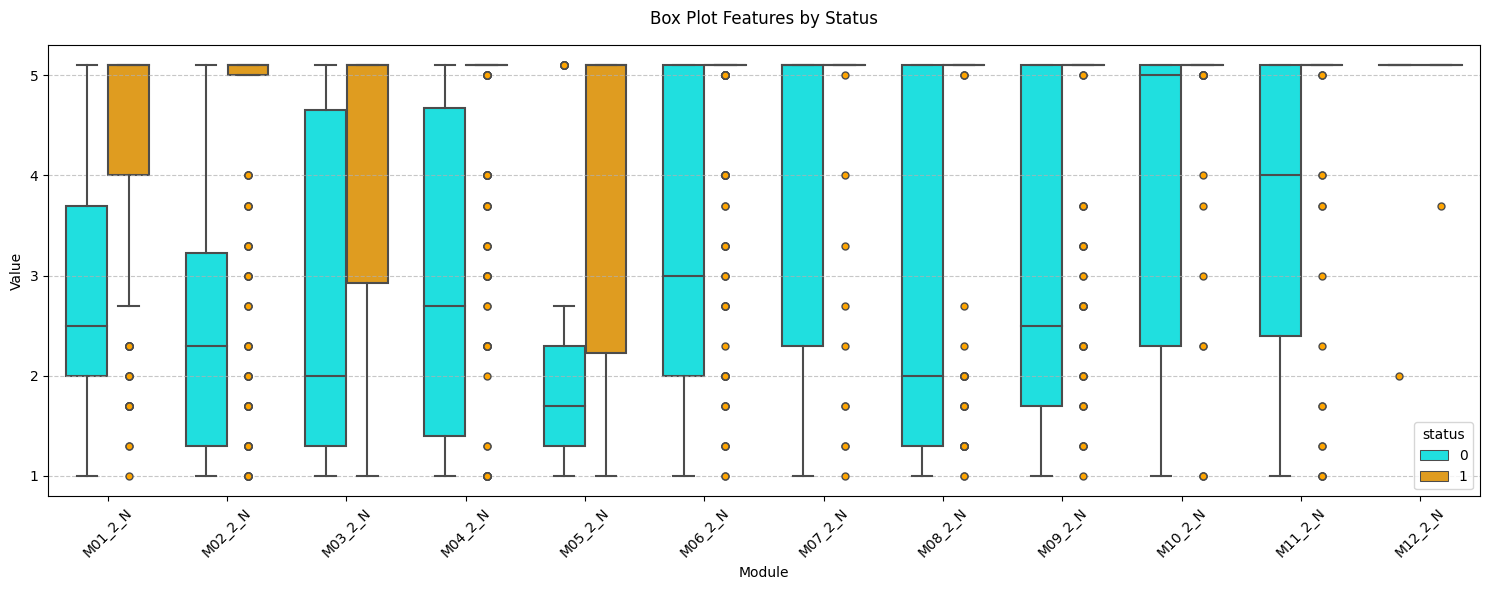

In [65]:
# Create a boxplot visualization comparing feature distributions between student status groups
# This helps compare the distribution of scores across different student status groups in THL_2 dataset
data_visualizer.create_status_boxplot(THL_2)

In [66]:
# Get detailed statistics broken down by student status for THL_2 dataset
# This provides a comprehensive overview of performance differences between different student groups
data_visualizer.get_status_statistics(THL_2)

count   mean  median    std  min     q1     q3  max    iqr
feature status                                                            
M01_2_N 0          54  2.820     2.5  1.270  1.0  2.000  3.700  5.1  1.700
        1         256  4.462     5.1  1.110  1.0  4.000  5.100  5.1  1.100
M02_2_N 0          54  2.491     2.3  1.317  1.0  1.300  3.225  5.1  1.925
        1         256  4.439     5.1  1.286  1.0  5.000  5.100  5.1  0.100
M03_2_N 0          54  2.652     2.0  1.568  1.0  1.300  4.650  5.1  3.350
        1         256  4.188     5.1  1.422  1.0  2.925  5.100  5.1  2.175
M04_2_N 0          54  2.857     2.7  1.539  1.0  1.400  4.675  5.1  3.275
        1         256  4.605     5.1  1.100  1.0  5.100  5.100  5.1  0.000
M05_2_N 0          54  2.363     1.7  1.443  1.0  1.300  2.300  5.1  1.000
        1         256  4.092     5.1  1.550  1.0  2.225  5.100  5.1  2.875
M06_2_N 0          54  3.209     3.0  1.552  1.0  2.000  5.100  5.1  3.100
        1         256  4.697     5.1  0.979  1.0  5.100  5.100  5.1  0.000
M07_2_N 0          54  3.750     5.1  1.672  1.0  2.300  5.100  5.1  2.800
        1         256  4.996     5.1  0.574  1.0  5.100  5.100  5.1  0.000
M08_2_N 0          54  3.156     2.0  1.835  1.0  1.300  5.100  5.1  3.800
        1         256  4.692     5.1  1.127  1.0  5.100  5.100  5.1  0.000
M09_2_N 0          54  3.269     2.5  1.702  1.0  1.700  5.100  5.1  3.400
        1         256  4.705     5.1  0.989  1.0  5.100  5.100  5.1  0.000
M10_2_N 0          54  3.815     5.0  1.614  1.0  2.300  5.100  5.1  2.800
        1         256  5.008     5.1  0.530  1.0  5.100  5.100  5.1  0.000
M11_2_N 0          54  3.672     4.0  1.509  1.0  2.400  5.100  5.1  2.700
        1         256  4.940     5.1  0.718  1.0  5.100  5.100  5.1  0.000
M12_2_N 0          54  5.043     5.1  0.422  2.0  5.100  5.100  5.1  0.000
        1         256  5.095     5.1  0.087  3.7  5.100  5.100  5.1  0.000

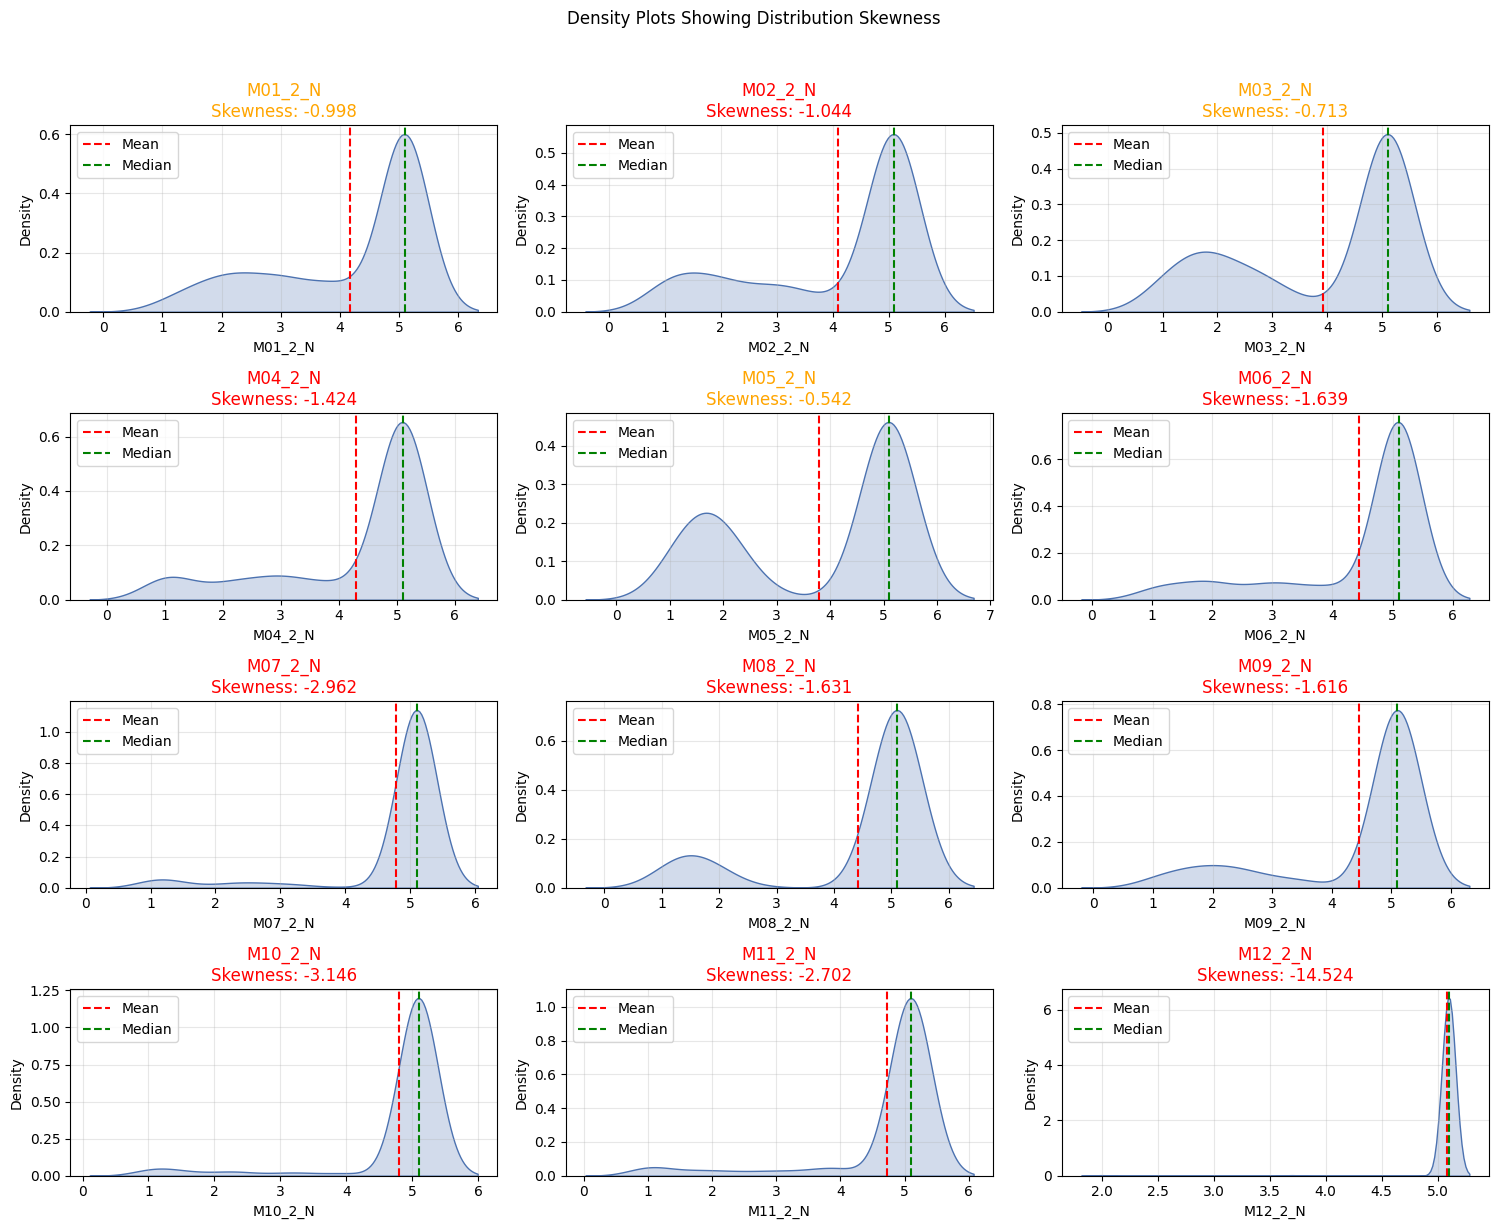

In [67]:
# Create density plots showing distribution skewness for THL_2 dataset
# This helps analyze the shape and symmetry of score distributions
# by displaying density curves with mean and median markers for each module
data_visualizer.plot_density_skewness(THL_2)

In [68]:
# Calculate skewness and kurtosis measures to understand the shape of distributions
# Skewness indicates asymmetry (negative = left tail, positive = right tail)
# Kurtosis indicates tail weight/peak (higher = heavier tails/sharper peak)
data_visualizer.calculate_distribution_shape(THL_2)

Feature  Skewness             Skewness_Interpretation  Kurtosis  \
0   M01_2_N    -0.998     Moderately Negative (Left Tail)    -0.531   
1   M02_2_N    -1.044  Highly Negative (Strong Left Tail)    -0.597   
2   M03_2_N    -0.713     Moderately Negative (Left Tail)    -1.261   
3   M04_2_N    -1.424  Highly Negative (Strong Left Tail)     0.521   
4   M05_2_N    -0.542     Moderately Negative (Left Tail)    -1.626   
5   M06_2_N    -1.639  Highly Negative (Strong Left Tail)     1.191   
6   M07_2_N    -2.962  Highly Negative (Strong Left Tail)     7.344   
7   M08_2_N    -1.631  Highly Negative (Strong Left Tail)     0.733   
8   M09_2_N    -1.616  Highly Negative (Strong Left Tail)     0.932   
9   M10_2_N    -3.146  Highly Negative (Strong Left Tail)     8.566   
10  M11_2_N    -2.702  Highly Negative (Strong Left Tail)     6.066   
11  M12_2_N   -14.524  Highly Negative (Strong Left Tail)   221.484   

                 Kurtosis_Interpretation  
0             Platykurtic (Light-tailed)  
1             Platykurtic (Light-tailed)  
2   Very Platykurtic (Very Light-tailed)  
3             Mesokurtic (Normal-tailed)  
4   Very Platykurtic (Very Light-tailed)  
5             Leptokurtic (Heavy-tailed)  
6             Leptokurtic (Heavy-tailed)  
7             Mesokurtic (Normal-tailed)  
8             Mesokurtic (Normal-tailed)  
9             Leptokurtic (Heavy-tailed)  
10            Leptokurtic (Heavy-tailed)  
11            Leptokurtic (Heavy-tailed)

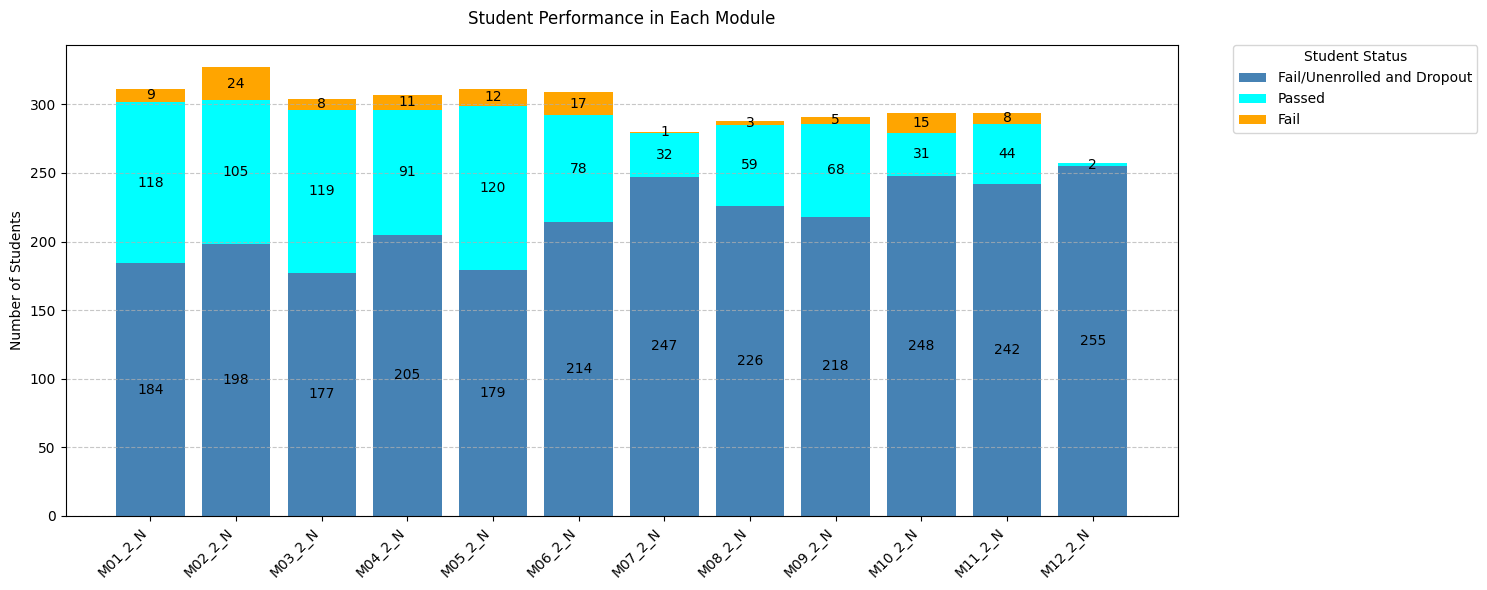

In [69]:
# Create a stacked bar plot showing the distribution of student performance across modules
# This visualization displays:
# - Number of students who passed each module
# - Number of students who failed each module
# - Breakdown by graduate vs dropout status
data_visualizer.plot_bar_matplotlib(THL_2)

In [70]:
# Create a DataFrame to store VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = THL_2.columns
vif_data["VIF"] = [variance_inflation_factor(THL_2.values, i) for i in range(len(THL_2.columns))]

# Display VIF values with stylinga
vif_data.set_index("Feature").sort_values("VIF", ascending=False).style.background_gradient(cmap='Reds')


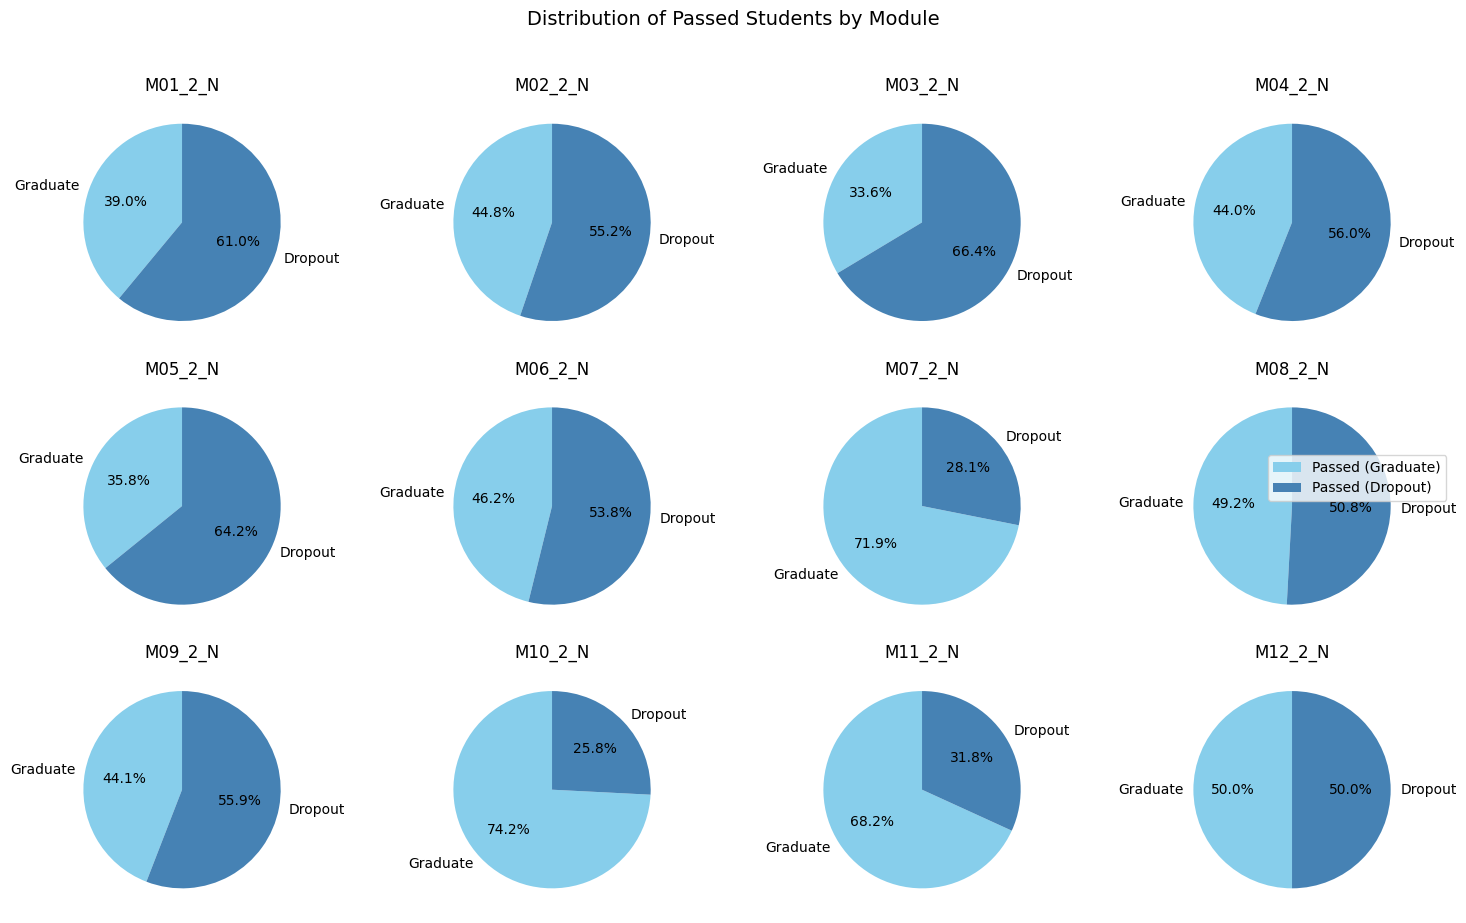

In [71]:
# Create a pie chart showing the distribution of passed students across modules
# This visualization displays:
# - Percentage of graduates vs dropouts among students who passed each module
# - Helps identify if passing students tend to graduate or dropout
data_visualizer.plot_passed_students_pie(THL_2)

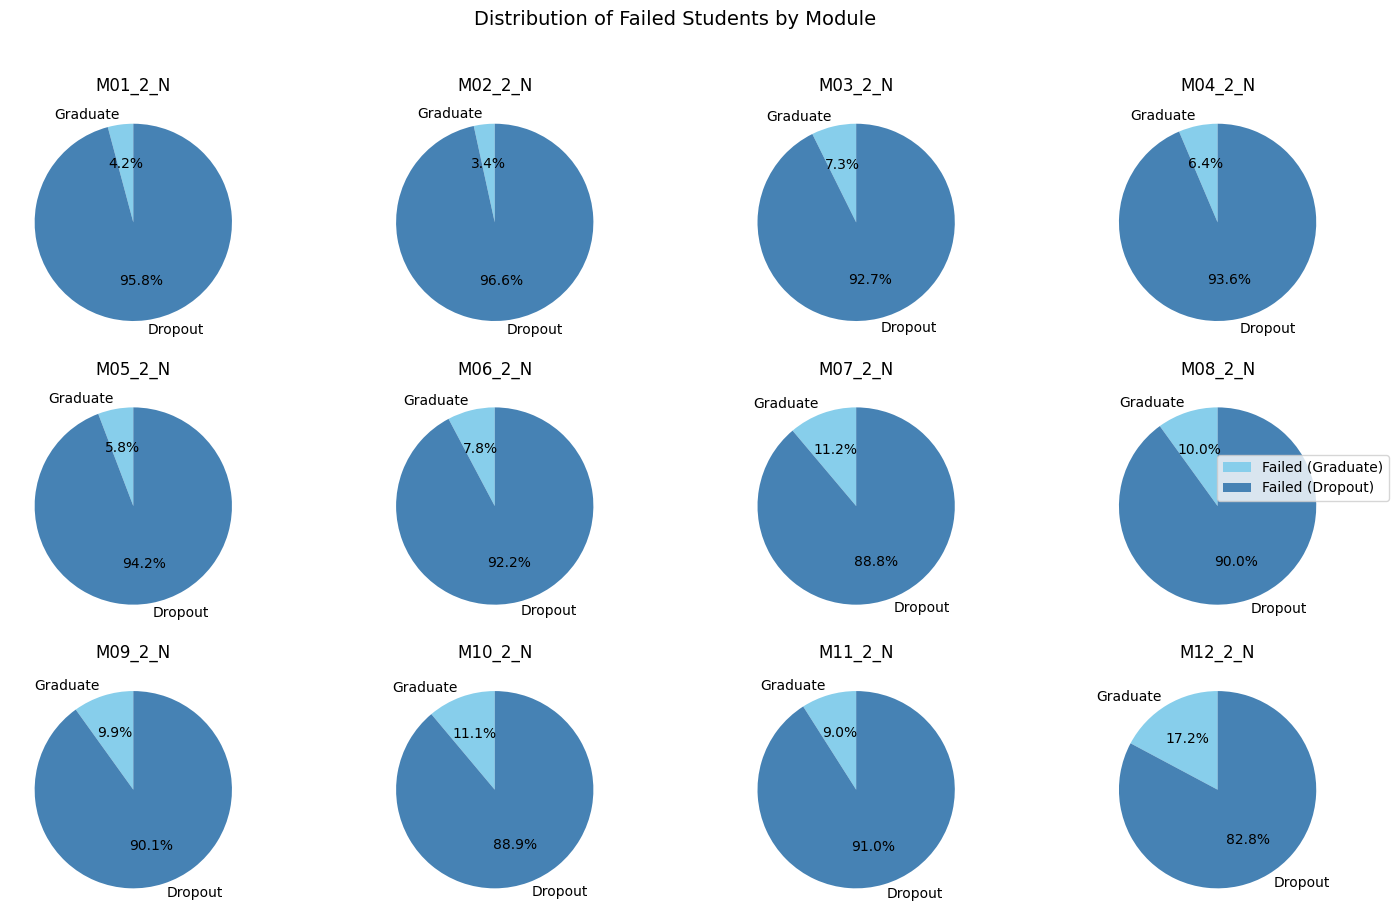

In [72]:
# Create a pie chart showing the distribution of failed students across modules
# This visualization displays:
# - Percentage of graduates vs dropouts among students who failed each module
# - Helps identify if failing students tend to graduate or dropout
data_visualizer.plot_failed_students_pie(THL_2)

### THL 3

In [66]:
print(THL_3.corrwith(THL_3['status'], method='spearman'))
THL_3.corr(method='spearman').style.background_gradient(cmap='Blues')

M01_3_N    0.504835
M02_3_N    0.505281
M03_3_N    0.425671
M04_3_N    0.482677
M05_3_N    0.365590
M06_3_N    0.423804
M07_3_N    0.459494
M08_3_N    0.374428
M09_3_N    0.467181
M10_3_N    0.647148
M11_3_N    0.577055
M12_3_N    0.116325
M13_3_N    0.278225
M14_3_N    0.429381
M15_3_N    0.222346
M16_3_N    0.633468
M17_3_N    0.355640
status     1.000000
dtype: float64


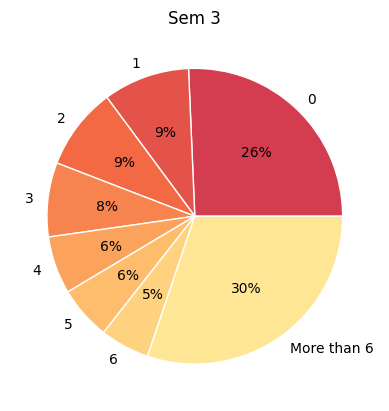

Distribution of students by number of modules enrolled:


Number of Modules  Percentage (%)
Number of Modules                                  
0                                 0            26.0
1                                 1             5.0
2                                 2             3.0
3                                 3             9.0
4                                 4             8.0
5                                 5             4.0
6                                 6             9.0
More than 6             More than 6            36.0

Text(0, 0.5, '')

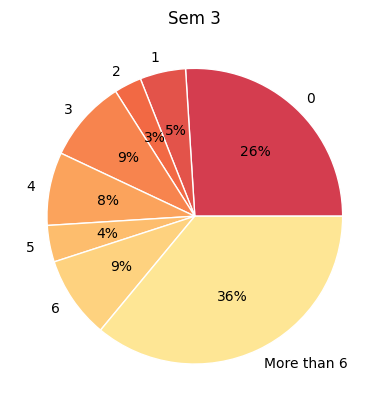

In [110]:
THL_3_count_subjects_per_student = count_subjects_per_student(THL_3)
plot_passed_courses_distribution(THL_3_count_subjects_per_student, 'enrolled_subjects', 'Sem 3')
module_counts = THL_3_count_subjects_per_student['enrolled_subjects'].value_counts().sort_index()

# Create a modified version where modules > 6 are grouped together
modified_counts = module_counts.copy()
more_than_6 = module_counts[module_counts.index > 6].sum()
modified_counts = modified_counts[modified_counts.index <= 6]
modified_counts.loc['More than 6'] = more_than_6

# Calculate the percentage of students enrolled in each module
total_students = len(THL_3_count_subjects_per_student)
module_percentages = (modified_counts / total_students * 100).round(0)

# Create a DataFrame to display the results
module_distribution = pd.DataFrame({
    'Number of Modules': modified_counts.index,
    'Percentage (%)': module_percentages.values
})
module_distribution.index = module_distribution['Number of Modules']

# Display the table
print("Distribution of students by number of modules enrolled:")
display(module_distribution)
module_distribution['Percentage (%)'].plot(kind='pie', autopct='%1.0f%%', colors=plt.cm.Spectral(np.linspace(0.1, 0.42, len(module_distribution))), wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Sem 3')
plt.ylabel('')

In [68]:
# Calculate central tendency measures (mean, median, mode) for THL_3 dataset
# This helps identify the typical performance level across all modules in THL_3 dataset
# Mean shows the average grade across all students
# Median indicates the middle value, less affected by outliers
# Mode reveals the most frequently occurring grade
# This combination helps identify typical performance and any grade clustering
data_visualizer.calculate_central_tendency(THL_3)

Feature   Mean  Median   Mode
0   M01_3_N  3.838     4.0  5.100
1   M02_3_N  3.726     5.0  5.100
2   M03_3_N  3.423     3.3  5.100
3   M04_3_N  3.909     5.1  5.100
4   M05_3_N  3.505     5.0  5.100
5   M06_3_N  4.289     5.1  5.100
6   M07_3_N  4.664     5.1  5.100
7   M08_3_N  4.218     5.1  5.100
8   M09_3_N  3.987     5.1  5.100
9   M10_3_N  4.481     5.1  5.100
10  M11_3_N  4.477     5.1  5.100
11  M12_3_N  5.063     5.1  5.100
12  M13_3_N  4.974     5.1  5.100
13  M14_3_N  4.610     5.1  5.100
14  M15_3_N  4.889     5.1  5.100
15  M16_3_N  4.160     5.1  5.100
16  M17_3_N  4.766     5.1  5.100

In [69]:
# Calculate dispersion measures (range, variance, standard deviation, IQR) for THL_3 dataset
# This helps understand the spread of grades across all modules in THL_3 dataset
# Range shows the full spread from lowest to highest grade
# Variance measures average squared deviation from the mean
# Standard deviation gives spread in same units as grades
# IQR shows spread of middle 50% of grades, robust to outliers
data_visualizer.calculate_dispersion_measures(THL_3)

Feature  Range  Variance  Std_Dev    IQR
0   M01_3_N    4.1     1.868    1.367  2.400
1   M02_3_N    4.1     2.518    1.587  3.025
2   M03_3_N    4.1     2.769    1.664  3.400
3   M04_3_N    4.1     2.254    1.501  2.400
4   M05_3_N    4.1     2.918    1.708  3.400
5   M06_3_N    4.1     1.764    1.328  1.400
6   M07_3_N    4.1     1.282    1.132  0.000
7   M08_3_N    4.1     2.394    1.547  0.100
8   M09_3_N    4.1     2.258    1.503  2.800
9   M10_3_N    4.1     1.542    1.242  0.100
10  M11_3_N    4.1     1.467    1.211  0.100
11  M12_3_N    3.8     0.116    0.341  0.000
12  M13_3_N    4.1     0.316    0.562  0.000
13  M14_3_N    4.1     1.355    1.164  0.000
14  M15_3_N    4.1     0.689    0.830  0.000
15  M16_3_N    4.1     2.447    1.564  1.800
16  M17_3_N    4.1     0.958    0.979  0.000

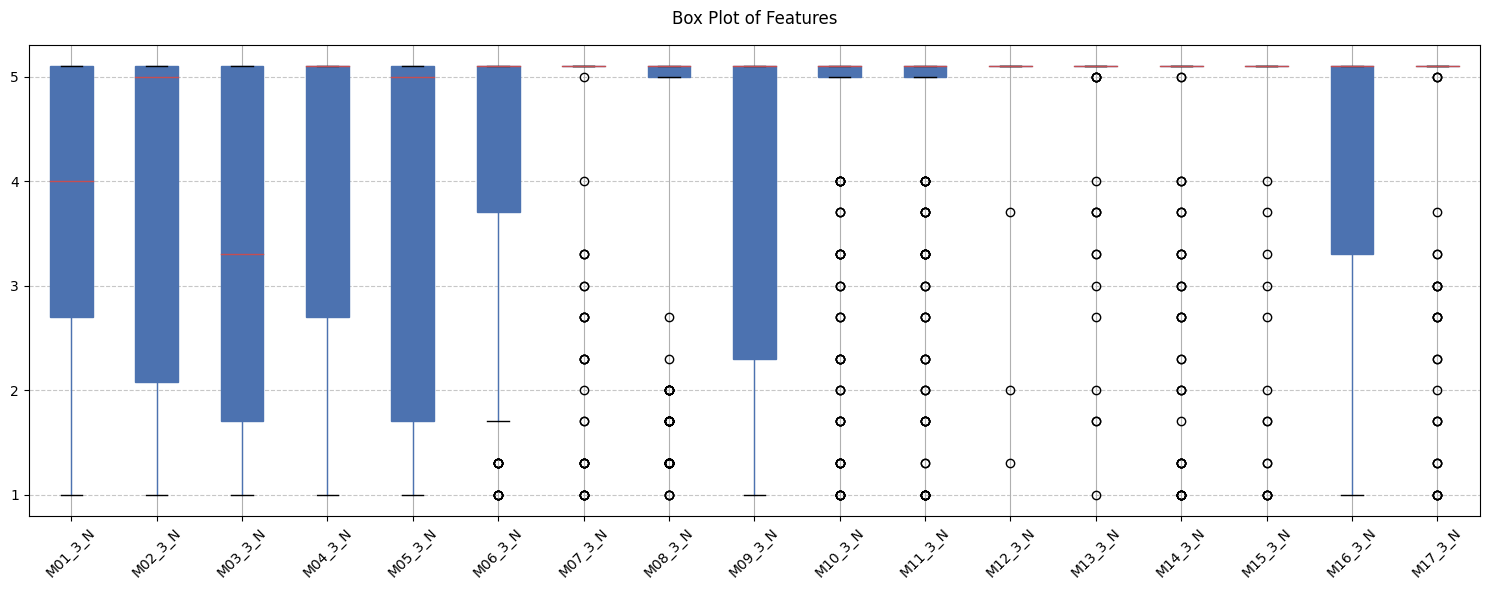

In [70]:
# Create a boxplot visualization of THL_3 dataset
# This helps compare the distribution of scores across all modules in THL_3 dataset
data_visualizer.create_boxplot(THL_3)

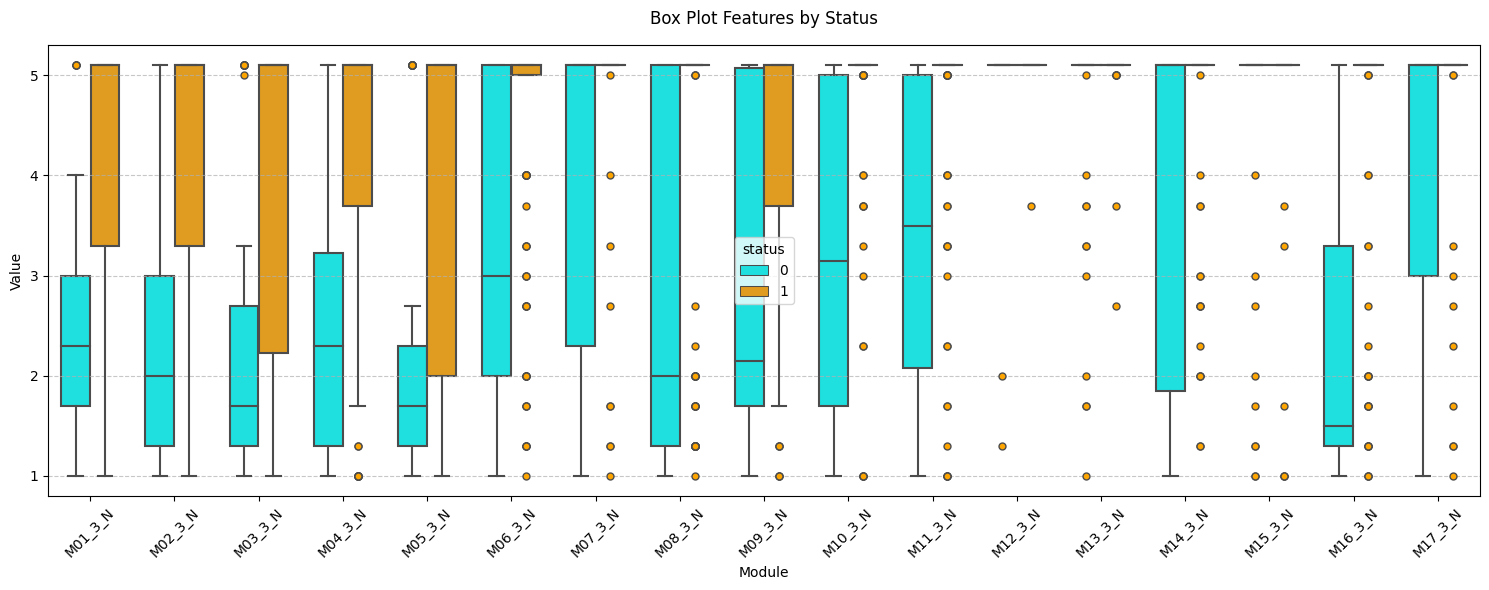

In [71]:
# Create a boxplot visualization comparing feature distributions between student status groups
# This helps compare the distribution of scores across different student status groups in THL_3 dataset
data_visualizer.create_status_boxplot(THL_3)

In [72]:
# Get detailed statistics broken down by student status for THL_3 dataset
# This provides a comprehensive overview of performance differences between different student groups
data_visualizer.get_status_statistics(THL_3)

count   mean  median    std  min     q1     q3  max    iqr
feature status                                                            
M01_3_N 0          54  2.611    2.30  1.107  1.0  1.700  3.000  5.1  1.300
        1         168  4.232    5.10  1.200  1.0  3.300  5.100  5.1  1.800
M02_3_N 0          54  2.270    2.00  1.192  1.0  1.300  3.000  5.1  1.700
        1         168  4.193    5.10  1.406  1.0  3.300  5.100  5.1  1.800
M03_3_N 0          54  2.206    1.70  1.358  1.0  1.300  2.700  5.1  1.400
        1         168  3.814    5.10  1.564  1.0  2.225  5.100  5.1  2.875
M04_3_N 0          54  2.572    2.30  1.451  1.0  1.300  3.225  5.1  1.925
        1         168  4.339    5.10  1.245  1.0  3.700  5.100  5.1  1.400
M05_3_N 0          54  2.363    1.70  1.443  1.0  1.300  2.300  5.1  1.000
        1         168  3.872    5.10  1.626  1.0  2.000  5.100  5.1  3.100
M06_3_N 0          54  3.209    3.00  1.552  1.0  2.000  5.100  5.1  3.100
        1         168  4.636    5.10  1.035  1.0  5.000  5.100  5.1  0.100
M07_3_N 0          54  3.750    5.10  1.672  1.0  2.300  5.100  5.1  2.800
        1         168  4.958    5.10  0.673  1.0  5.100  5.100  5.1  0.000
M08_3_N 0          54  3.156    2.00  1.835  1.0  1.300  5.100  5.1  3.800
        1         168  4.560    5.10  1.272  1.0  5.100  5.100  5.1  0.000
M09_3_N 0          54  2.737    2.15  1.557  1.0  1.700  5.075  5.1  3.375
        1         168  4.389    5.10  1.245  1.0  3.700  5.100  5.1  1.400
M10_3_N 0          54  3.170    3.15  1.541  1.0  1.700  5.000  5.1  3.300
        1         168  4.902    5.10  0.744  1.0  5.100  5.100  5.1  0.000
M11_3_N 0          54  3.409    3.50  1.465  1.0  2.075  5.000  5.1  2.925
        1         168  4.821    5.10  0.879  1.0  5.100  5.100  5.1  0.000
M12_3_N 0          54  4.972    5.10  0.661  1.3  5.100  5.100  5.1  0.000
        1         168  5.092    5.10  0.108  3.7  5.100  5.100  5.1  0.000
M13_3_N 0          54  4.661    5.10  1.020  1.0  5.100  5.100  5.1  0.000
        1         168  5.075    5.10  0.214  2.7  5.100  5.100  5.1  0.000
M14_3_N 0          54  3.735    5.10  1.712  1.0  1.850  5.100  5.1  3.250
        1         168  4.891    5.10  0.732  1.3  5.100  5.100  5.1  0.000
M15_3_N 0          54  4.583    5.10  1.233  1.0  5.100  5.100  5.1  0.000
        1         168  4.988    5.10  0.624  1.0  5.100  5.100  5.1  0.000
M16_3_N 0          54  2.435    1.50  1.615  1.0  1.300  3.300  5.1  2.000
        1         168  4.714    5.10  1.068  1.0  5.100  5.100  5.1  0.000
M17_3_N 0          54  4.180    5.10  1.455  1.0  3.000  5.100  5.1  2.100
        1         168  4.955    5.10  0.670  1.0  5.100  5.100  5.1  0.000

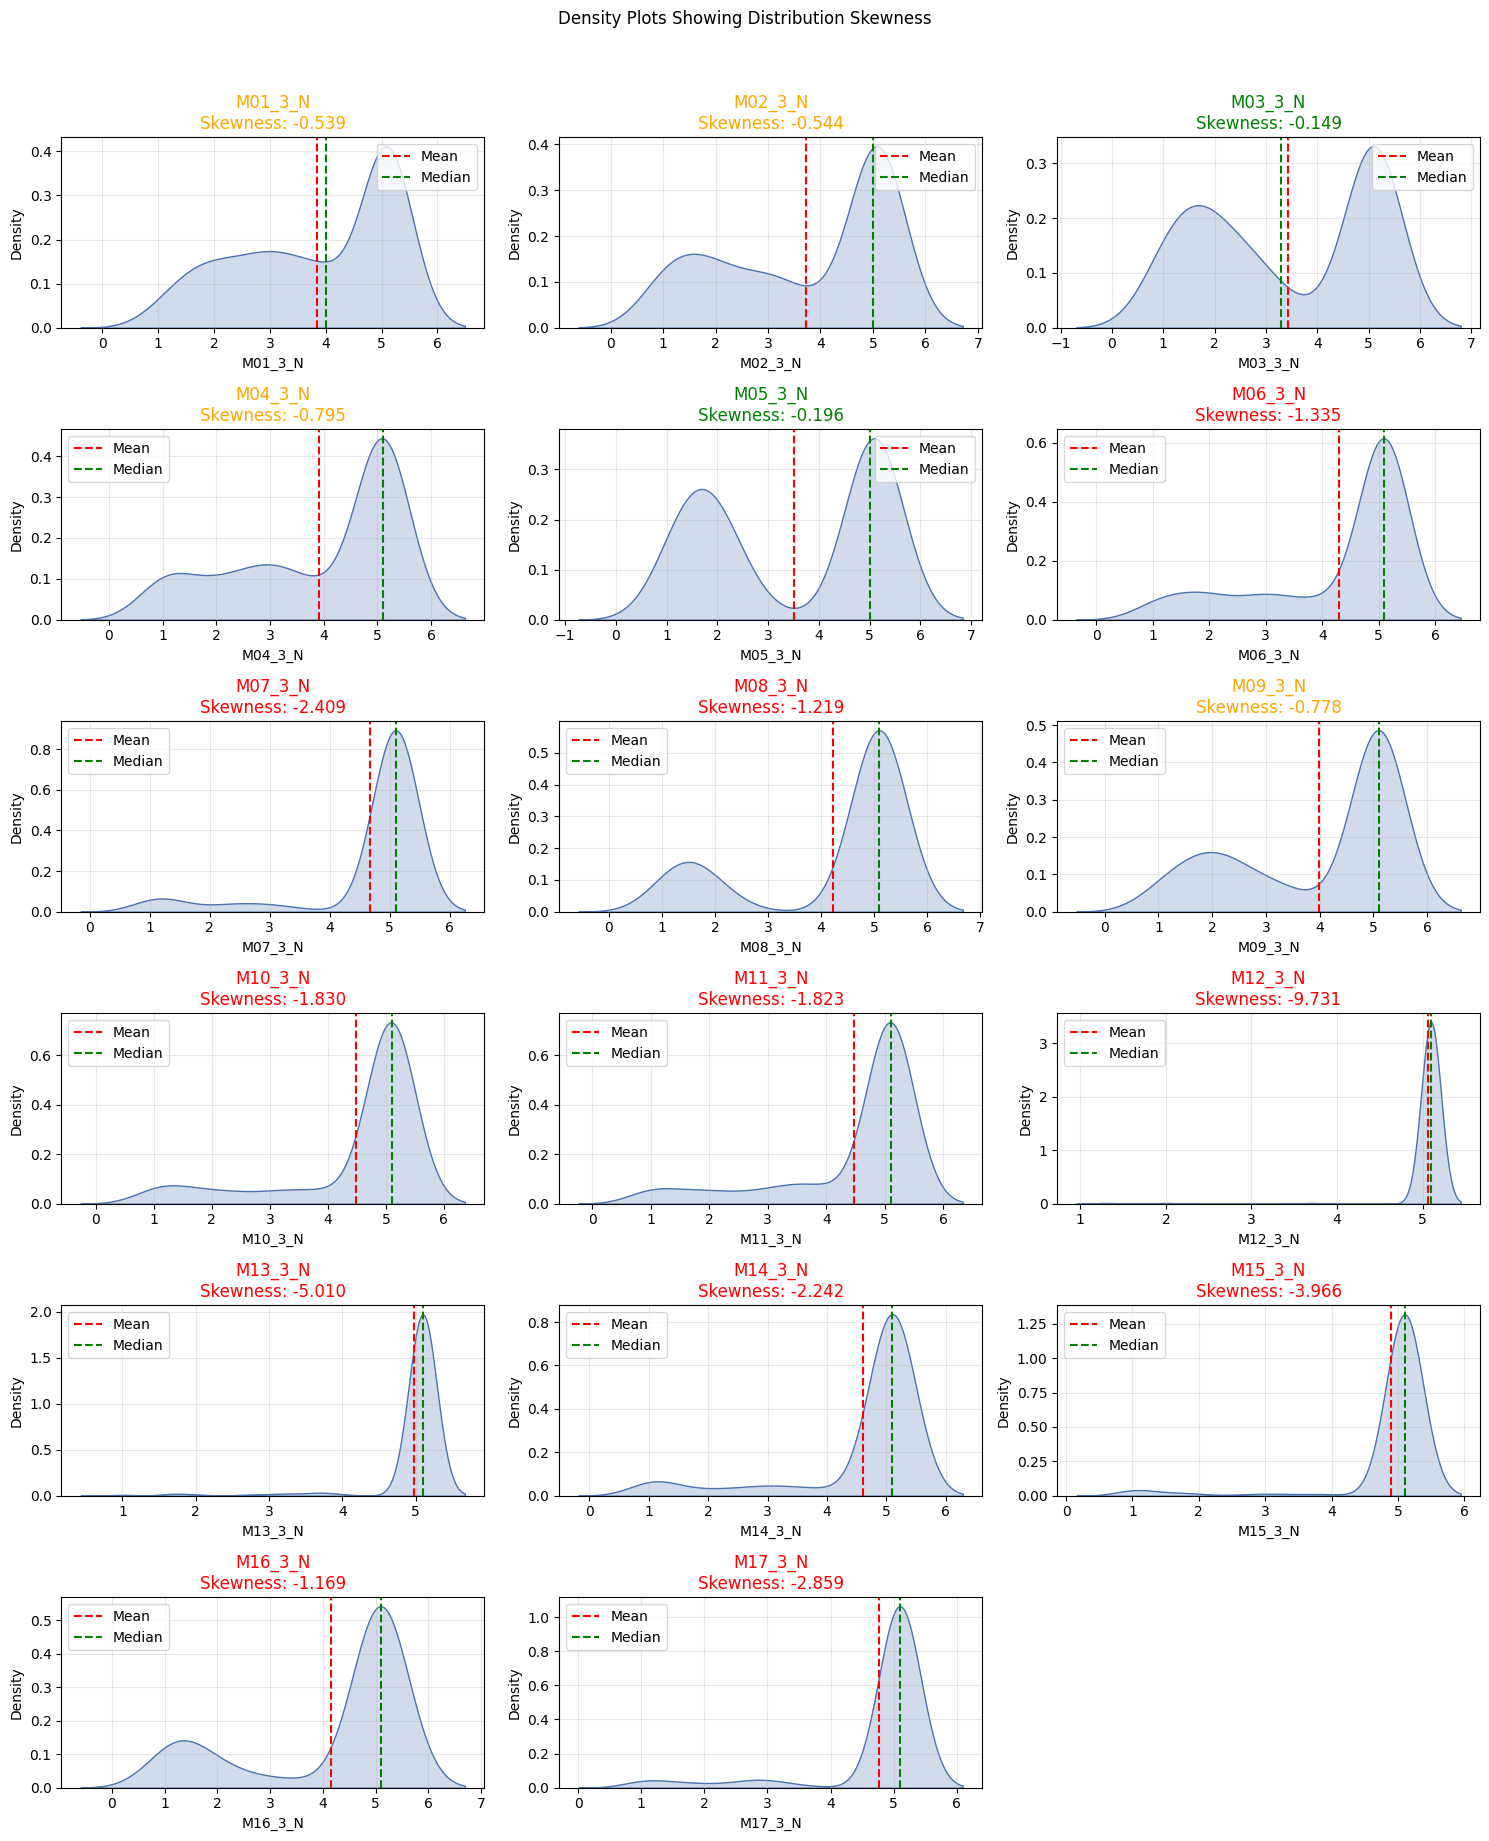

In [73]:
# Create density plots showing distribution skewness for THL_3 dataset
# This helps analyze the shape and symmetry of score distributions
# by displaying density curves with mean and median markers for each module
data_visualizer.plot_density_skewness(THL_3)

In [74]:
# Calculate skewness and kurtosis measures to understand the shape of distributions
# Skewness indicates asymmetry (negative = left tail, positive = right tail)
# Kurtosis indicates tail weight/peak (higher = heavier tails/sharper peak)
data_visualizer.calculate_distribution_shape(THL_3)

Feature  Skewness             Skewness_Interpretation  Kurtosis  \
0   M01_3_N    -0.539     Moderately Negative (Left Tail)    -1.177   
1   M02_3_N    -0.544     Moderately Negative (Left Tail)    -1.383   
2   M03_3_N    -0.149             Approximately Symmetric    -1.739   
3   M04_3_N    -0.795     Moderately Negative (Left Tail)    -0.913   
4   M05_3_N    -0.196             Approximately Symmetric    -1.879   
5   M06_3_N    -1.335  Highly Negative (Strong Left Tail)     0.238   
6   M07_3_N    -2.409  Highly Negative (Strong Left Tail)     4.252   
7   M08_3_N    -1.219  Highly Negative (Strong Left Tail)    -0.460   
8   M09_3_N    -0.778     Moderately Negative (Left Tail)    -1.127   
9   M10_3_N    -1.830  Highly Negative (Strong Left Tail)     1.846   
10  M11_3_N    -1.823  Highly Negative (Strong Left Tail)     1.976   
11  M12_3_N    -9.731  Highly Negative (Strong Left Tail)    97.303   
12  M13_3_N    -5.010  Highly Negative (Strong Left Tail)    26.031   
13  M14_3_N    -2.242  Highly Negative (Strong Left Tail)     3.580   
14  M15_3_N    -3.966  Highly Negative (Strong Left Tail)    14.540   
15  M16_3_N    -1.169  Highly Negative (Strong Left Tail)    -0.491   
16  M17_3_N    -2.859  Highly Negative (Strong Left Tail)     6.892   

                 Kurtosis_Interpretation  
0   Very Platykurtic (Very Light-tailed)  
1   Very Platykurtic (Very Light-tailed)  
2   Very Platykurtic (Very Light-tailed)  
3             Platykurtic (Light-tailed)  
4   Very Platykurtic (Very Light-tailed)  
5             Mesokurtic (Normal-tailed)  
6             Leptokurtic (Heavy-tailed)  
7             Platykurtic (Light-tailed)  
8   Very Platykurtic (Very Light-tailed)  
9             Leptokurtic (Heavy-tailed)  
10            Leptokurtic (Heavy-tailed)  
11            Leptokurtic (Heavy-tailed)  
12            Leptokurtic (Heavy-tailed)  
13            Leptokurtic (Heavy-tailed)  
14            Leptokurtic (Heavy-tailed)  
15            Platykurtic (Light-tailed)  
16            Leptokurtic (Heavy-tailed)

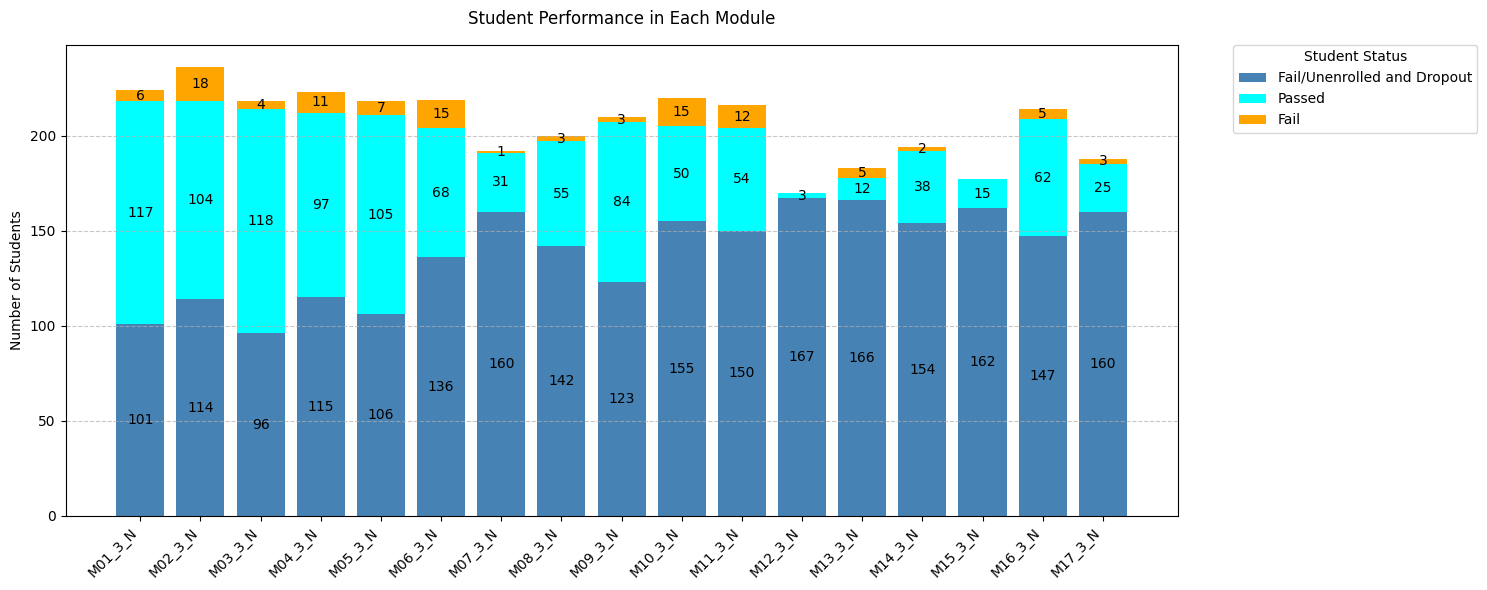

In [75]:
# Create a stacked bar plot showing the distribution of student performance across modules
# This visualization displays:
# - Number of students who passed each module
# - Number of students who failed each module
# - Breakdown by graduate vs dropout status
data_visualizer.plot_bar_matplotlib(THL_3)

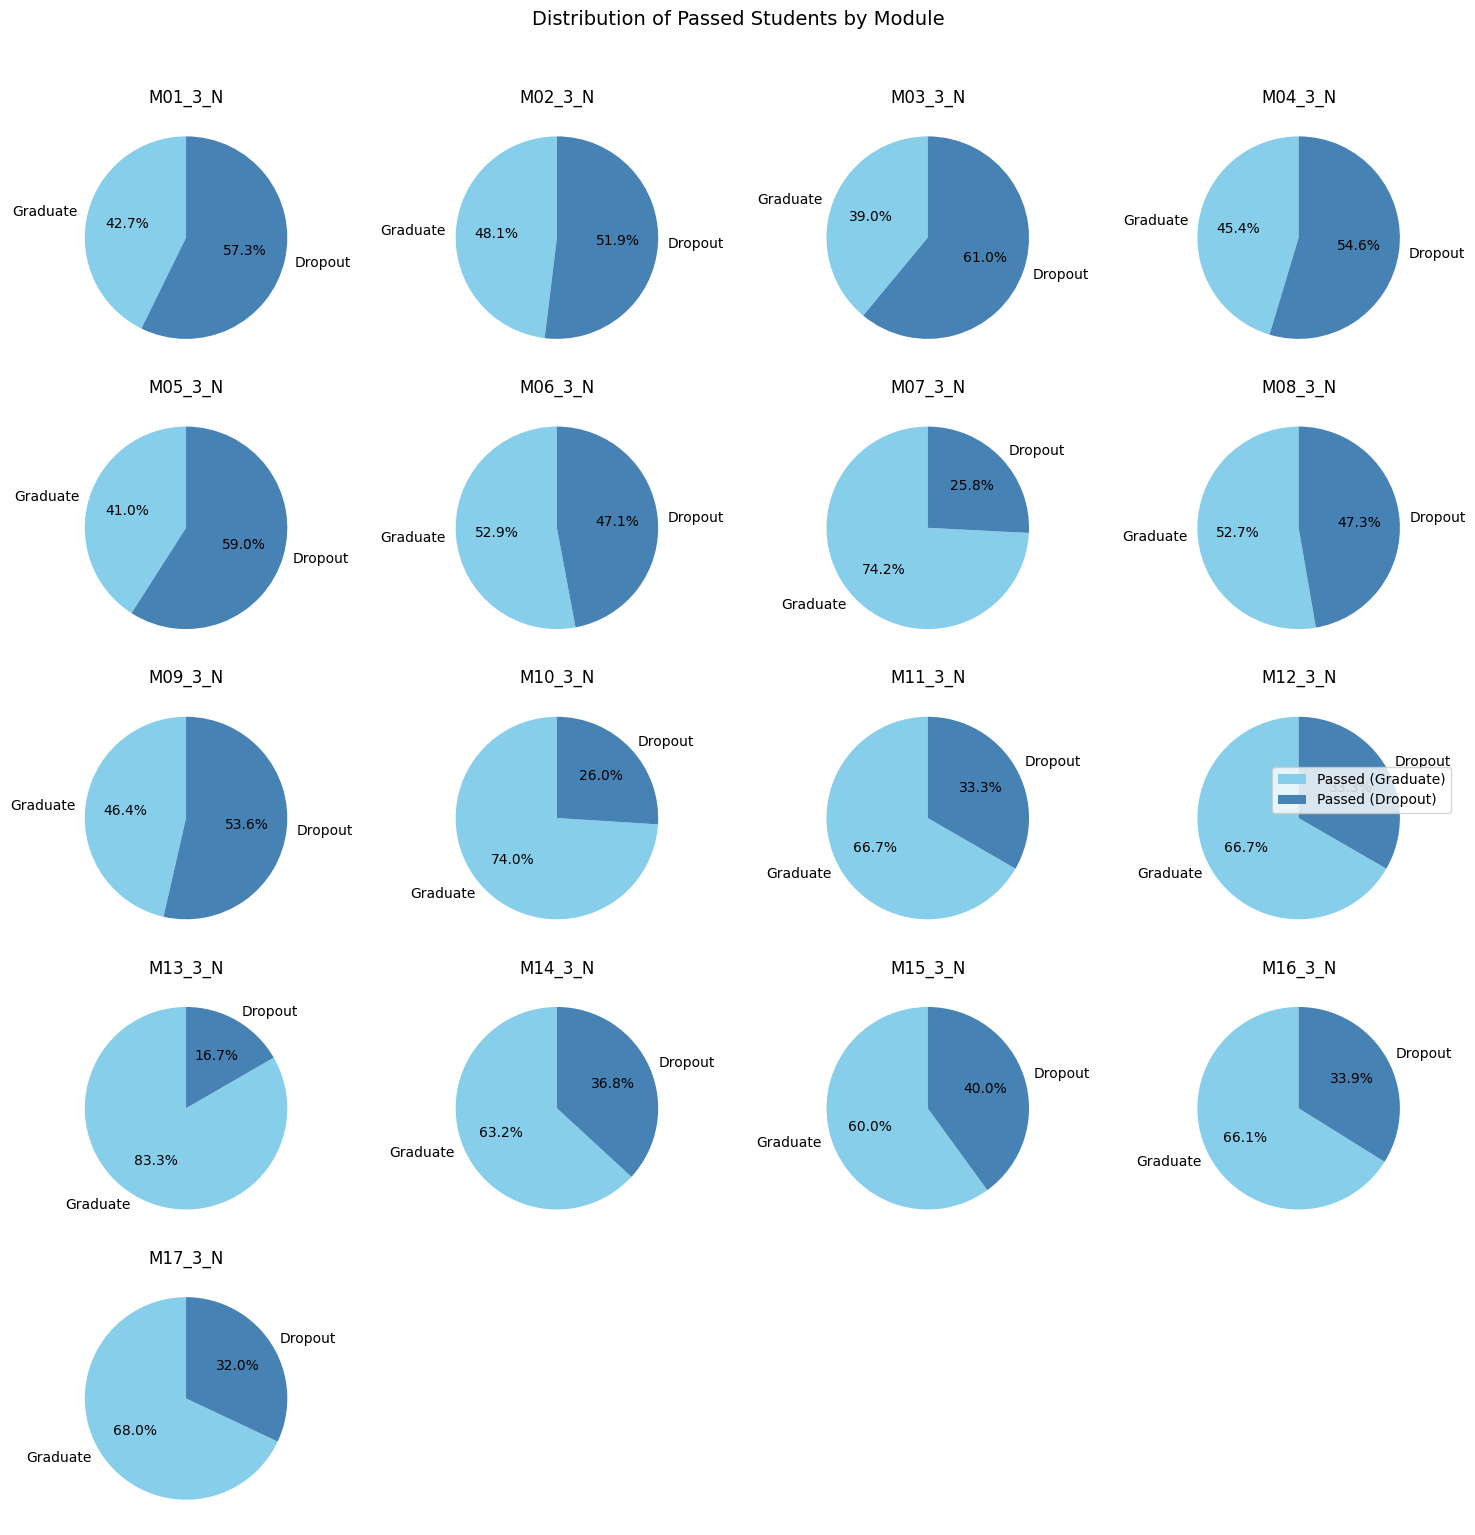

In [76]:
# Create a pie chart showing the distribution of passed students across modules
# This visualization displays:
# - Percentage of graduates vs dropouts among students who passed each module
# - Helps identify if passing students tend to graduate or dropout
data_visualizer.plot_passed_students_pie(THL_3)

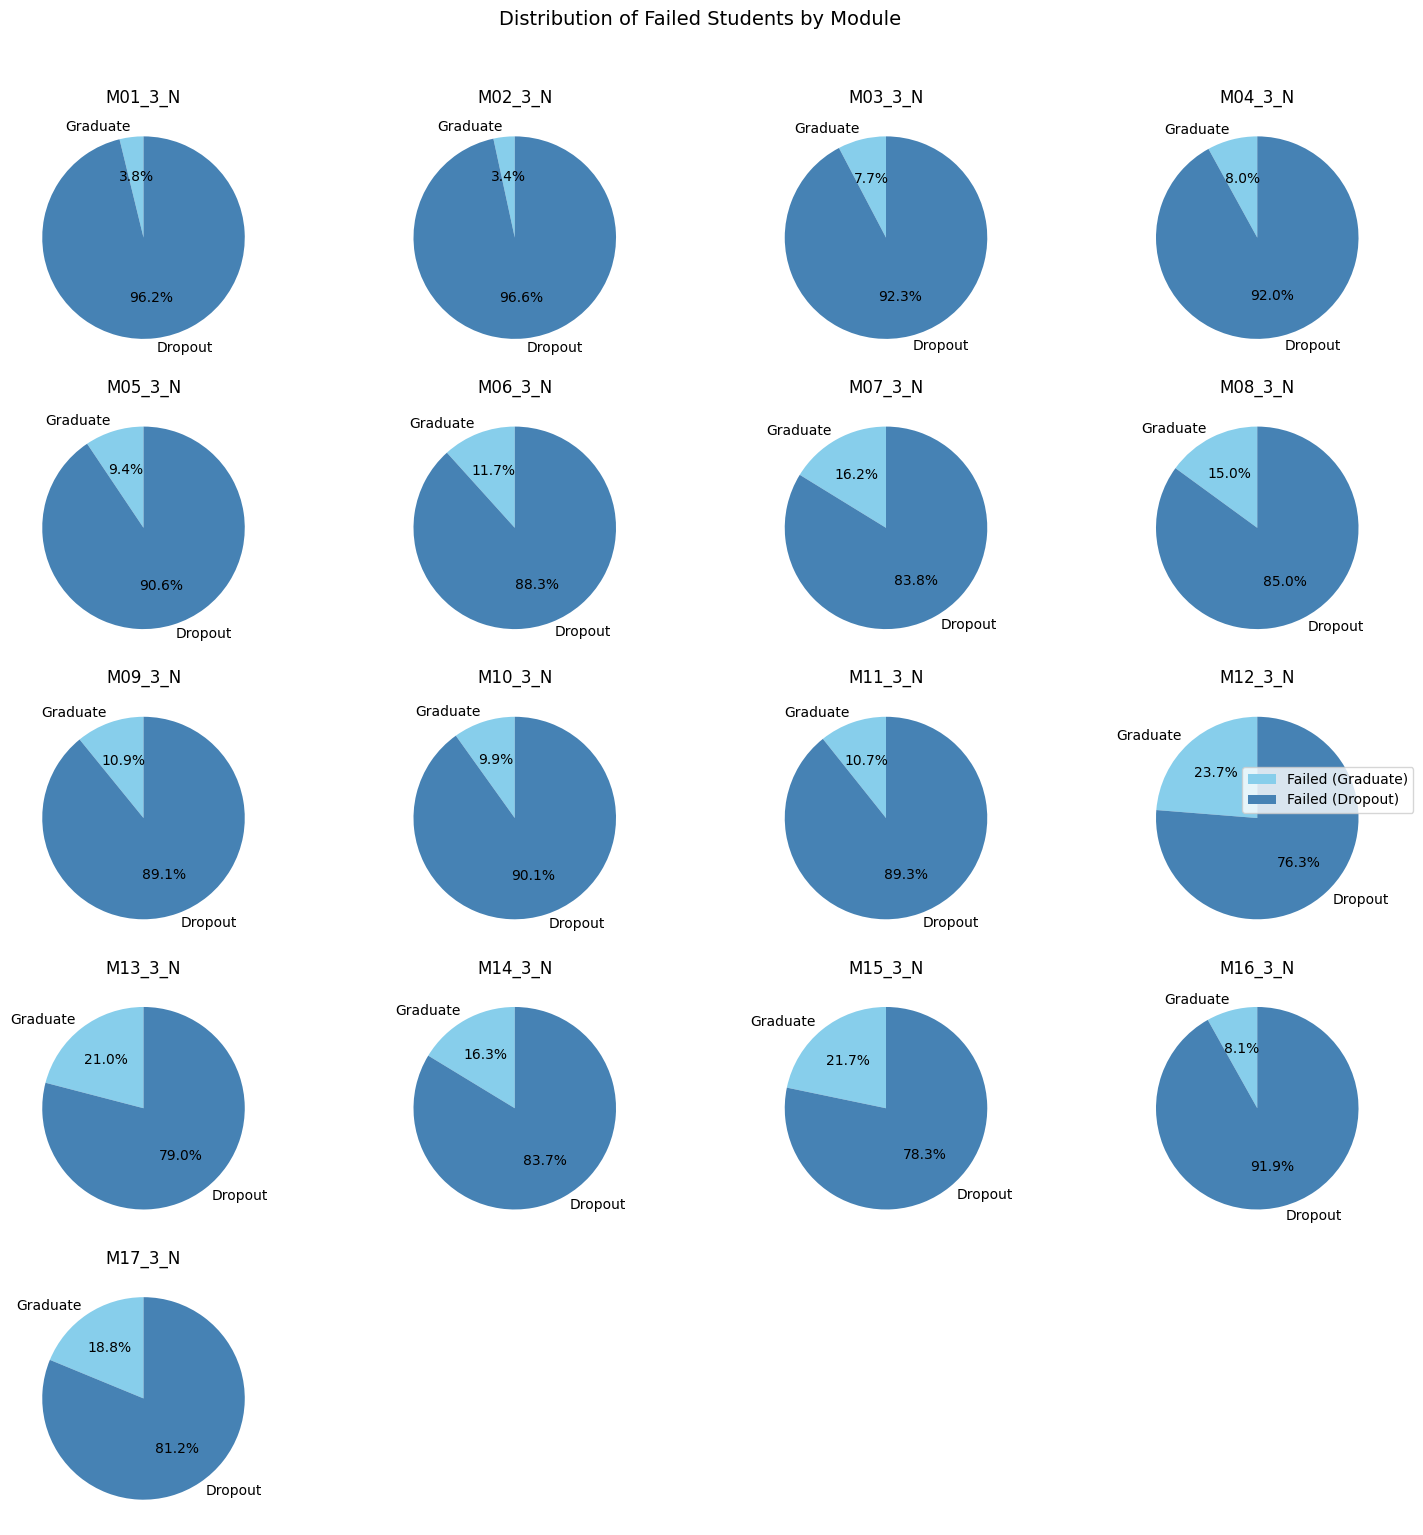

In [77]:
# Create a pie chart showing the distribution of failed students across modules
# This visualization displays:
# - Percentage of graduates vs dropouts among students who failed each module
# - Helps identify if failing students tend to graduate or dropout
data_visualizer.plot_failed_students_pie(THL_3)

In [78]:
THL_1

M01_1_N  M02_1_N  M03_1_N  M04_1_N  M05_1_N  M06_1_N  status
0        5.1      5.1      5.1      5.1      5.1      5.1       1
1        5.1      5.1      5.1      5.1      5.1      5.1       1
2        1.7      5.1      5.1      3.3      1.7      5.1       1
3        5.1      5.1      5.1      5.1      5.1      5.1       1
4        5.1      5.1      5.1      5.1      5.1      5.1       1
..       ...      ...      ...      ...      ...      ...     ...
472      5.1      5.1      5.1      5.1      5.1      5.1       1
473      5.1      5.1      5.1      5.1      5.1      5.1       1
474      5.1      5.1      5.1      5.1      5.1      5.1       1
475      1.7      3.3      5.1      1.3      1.7      2.3       1
476      5.1      5.1      5.1      5.1      5.1      5.1       1

[477 rows x 7 columns]